In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


# General steps

### Note - these steps can have a change in order depending on particular dataset

1. Get an idea of dataset (shapes, info, columns and column types etc.)
2. Data cleaning (fillna, dropna etc.)
3. Univariate analysis (skewness, kurtosis, distribution, mean, median, std etc.)
4. Bivariate analysis (correlation of features with dependent variable y. Heteroscedascticity and ANOVA)
5. Encoding
6. Multivariate analysis (IVF analysis and OLS)

- Lastly we can also use automatic profiling like pandas_profiling and dtale, autoviz, sweet_viz, dataprep, lux

In [2]:
file_path = "/kaggle/input/home-data-for-ml-course/train.csv"

In [3]:
df = pd.read_csv(file_path)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('ggplot')

# Data cleaning

In [5]:
df.shape

(1460, 81)

In [10]:
df = df.drop(columns='Id')

<Axes: >

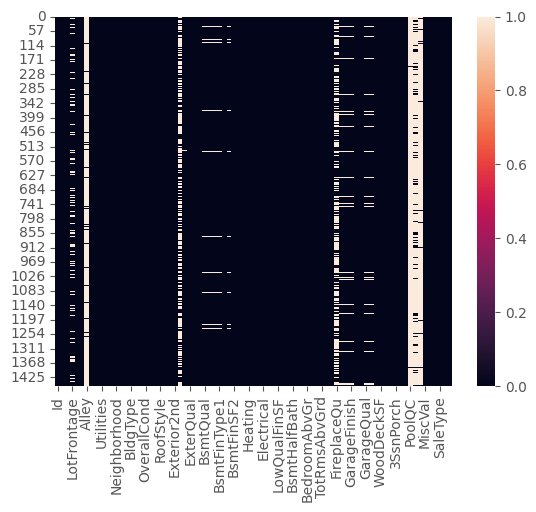

In [6]:
sns.heatmap(df.isnull())

In [8]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

- The description of dataset has declared that null means the house doesn't have that particular feature, therefore all nans will be filled with 0 and all featured null will be filled with a new feature 'Not Available'

In [11]:
df.fillna(0, inplace=True)
for col in df.columns:
    if df[col].dtype == 'object':  
        df[col].fillna('Not available', inplace=True)


In [12]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave     0      Reg   
1             20       RL         80.0     9600   Pave     0      Reg   
2             60       RL         68.0    11250   Pave     0      IR1   
3             70       RL         60.0     9550   Pave     0      IR1   
4             60       RL         84.0    14260   Pave     0      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave     0      Reg   
1456          20       RL         85.0    13175   Pave     0      Reg   
1457          70       RL         66.0     9042   Pave     0      Reg   
1458          20       RL         68.0     9717   Pave     0      Reg   
1459          20       RL         75.0     9937   Pave     0      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0      0      0           0   
1            Lvl    AllPub       FR2  ...        0      0      0           0   
2            Lvl    AllPub    Inside  ...        0      0      0           0   
3            Lvl    AllPub    Corner  ...        0      0      0           0   
4            Lvl    AllPub       FR2  ...        0      0      0           0   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1455         Lvl    AllPub    Inside  ...        0      0      0           0   
1456         Lvl    AllPub    Inside  ...        0      0  MnPrv           0   
1457         Lvl    AllPub    Inside  ...        0      0  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0      0      0           0   
1459         Lvl    AllPub    Inside  ...        0      0      0           0   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      2    2008        WD         Normal     208500  
1          0      5    2007        WD         Normal     181500  
2          0      9    2008        WD         Normal     223500  
3          0      2    2006        WD        Abnorml     140000  
4          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1455       0      8    2007        WD         Normal     175000  
1456       0      2    2010        WD         Normal     210000  
1457    2500      5    2010        WD         Normal     266500  
1458       0      4    2010        WD         Normal     142125  
1459       0      6    2008        WD         Normal     147500  

[1460 rows x 80 columns]

In [13]:
for col in df:
    if col[0].isdigit():
        df.rename(columns={col:"num"+col}, inplace=True)
        print(col)

1stFlrSF
2ndFlrSF
3SsnPorch


In [14]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'num1stFlrSF', 'num2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Univeriate analysis

In [15]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [16]:
def unistats(df, sort_by="skew"):
    import pandas as pd
    
    output_df = pd.DataFrame(columns=['count', 'missing', 'unique', 'dtype', 'min', 'max', 'mean', 'median', 'mode', 'std', 'skew', 'kurt', 'numeric'])
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, df[col].min(), df[col].max(), df[col].mean(), df[col].median(), df[col].mode().values[0], df[col].std(), df[col].skew(), df[col].kurt(), pd.api.types.is_numeric_dtype(df[col])]
        else:
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, '-', '-', '-', '-', df[col].mode().values[0], '-', '-', '-', pd.api.types.is_numeric_dtype(df[col])]
    return output_df.sort_values(by=["numeric", f"{sort_by}"], ascending=False)

In [17]:
pd.set_option('display.max_rows', 100)
unistats(df)

count  missing  unique    dtype    min     max          mean  \
MiscVal         1460        0      21    int64      0   15500     43.489041   
PoolArea        1460        0       8    int64      0     738      2.758904   
LotArea         1460        0    1073    int64   1300  215245  10516.828082   
num3SsnPorch    1460        0      20    int64      0     508      3.409589   
LowQualFinSF    1460        0      24    int64      0     572      5.844521   
KitchenAbvGr    1460        0       4    int64      0       3      1.046575   
BsmtFinSF2      1460        0     144    int64      0    1474     46.549315   
ScreenPorch     1460        0      76    int64      0     480     15.060959   
BsmtHalfBath    1460        0       3    int64      0       2      0.057534   
EnclosedPorch   1460        0     120    int64      0     552      21.95411   
MasVnrArea      1460        0     327  float64    0.0  1600.0    103.117123   
OpenPorchSF     1460        0     202    int64      0     547     46.660274   
SalePrice       1460        0     663    int64  34900  755000  180921.19589   
BsmtFinSF1      1460        0     637    int64      0    5644    443.639726   
WoodDeckSF      1460        0     274    int64      0     857     94.244521   
TotalBsmtSF     1460        0     721    int64      0    6110   1057.429452   
MSSubClass      1460        0      15    int64     20     190      56.89726   
num1stFlrSF     1460        0     753    int64    334    4692   1162.626712   
GrLivArea       1460        0     861    int64    334    5642   1515.463699   
BsmtUnfSF       1460        0     780    int64      0    2336    567.240411   
num2ndFlrSF     1460        0     417    int64      0    2065    346.992466   
OverallCond     1460        0       9    int64      1       9      5.575342   
TotRmsAbvGrd    1460        0      12    int64      2      14      6.517808   
HalfBath        1460        0       3    int64      0       2      0.382877   
Fireplaces      1460        0       4    int64      0       3      0.613014   
BsmtFullBath    1460        0       4    int64      0       3      0.425342   
LotFrontage     1460        0     111  float64    0.0   313.0     57.623288   
OverallQual     1460        0      10    int64      1      10      6.099315   
MoSold          1460        0      12    int64      1      12      6.321918   
BedroomAbvGr    1460        0       8    int64      0       8      2.866438   
GarageArea      1460        0     441    int64      0    1418    472.980137   
YrSold          1460        0       5    int64   2006    2010   2007.815753   
FullBath        1460        0       4    int64      0       3      1.565068   
GarageCars      1460        0       5    int64      0       4      1.767123   
YearRemodAdd    1460        0      61    int64   1950    2010   1984.865753   
YearBuilt       1460        0     112    int64   1872    2010   1971.267808   
GarageYrBlt     1460        0      98  float64    0.0  2010.0   1868.739726   
MSZoning        1460        0       5   object      -       -             -   
Street          1460        0       2   object      -       -             -   
Alley           1460        0       3   object      -       -             -   
LotShape        1460        0       4   object      -       -             -   
LandContour     1460        0       4   object      -       -             -   
Utilities       1460        0       2   object      -       -             -   
LotConfig       1460        0       5   object      -       -             -   
LandSlope       1460        0       3   object      -       -             -   
Neighborhood    1460        0      25   object      -       -             -   
Condition1      1460        0       9   object      -       -             -   
Condition2      1460        0       8   object      -       -             -   
BldgType        1460        0       5   object      -       -             -   
HouseStyle      1460        0       8   object      -       -    

# Bivariate analysis and visualization

In [200]:
def heteroscedascity(df, feature, label):
    from statsmodels.stats.diagnostic import het_breuschpagan
    from statsmodels.stats.diagnostic import het_white
    import pandas as pd
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    
    model = ols(formula=(label + '~' + feature), data=df).fit()
    
    try:
        white_test = het_white(model.resid, model.model.exog)
        output_df.loc['white'] = white_test
    except:
        print("Unable to calculate white hetroscedasticity")
        
        
    bp_test = het_breuschpagan(model.resid, model.model.exog)    
    
    output_df = pd.DataFrame(columns=['LM stat  ', 'LM p-value ', 'F-stat ', 'F p-value '])
    output_df.loc['Breusch-Pagan'] = bp_test
    
    return output_df.round(3)

In [201]:
def scatter(feature, label):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd
    from scipy import stats
    
    m,b,r,p,err = stats.linregress(feature, label)
    text_str = "y = " + str(round(m, 2)) + "x = " + str(round(b, 2)) + '\n'
    text_str += "r^2 = " + str(round(r**2, 2)) + '\n'
    text_str += "p = " + str(round(p, 2)) + '\n'
    text_str += str(feature.name) + " skew = " + str(round(feature.skew(), 2)) + '\n'
    text_str += str(label.name) + " skew = " + str(round(label.skew(), 2)) + '\n'
    text_str += str(heteroscedascity(pd.DataFrame(label).join(pd.DataFrame(feature)), feature.name, label.name)) + '\n'
    
    
    sns.set(color_codes = True)
    ax = sns.jointplot(x=feature, y=label, kind='reg')
    ax.fig.text(1,0.114, text_str, transform=plt.gcf().transFigure)
    plt.show()

In [202]:
def anova(df, feature, label):
    import pandas as pd
    import numpy as np
    from scipy import stats
    
    groups = df[feature].unique()
    df_grouped = df.groupby(feature)
    group_labels = []
    
    for g in groups:
        g_list = df_grouped.get_group(g)
        group_labels.append(g_list[label])
        
    return stats.f_oneway(*group_labels)
    

In [213]:
def bar_chart(df, feature, label):
    import pandas as pd
    from scipy import stats
    from matplotlib import pyplot as plt
    
    groups = df[feature].unique()
    df_grouped = df.groupby(feature)
    group_labels = []
    
    for g in groups:
        g_list = df_grouped.get_group(g)
        group_labels.append(g_list[label])
        
    oneway = stats.f_oneway(*group_labels)
    unique_groups = df[feature].unique()
    ttests = []
        
    for i, group in enumerate(unique_groups):
        for i2, group_2 in enumerate(unique_groups):
            if i2 > i:
                type_1 = df[df[feature] == group]
                type_2 = df[df[feature] == group_2]
                
                if len(type_1[label] < 2) or len(type_2[label] < 2):
                    print(" " + str(group) + " n= " + str(len(type_1))+ "; " + "and " + str(group_2) + " n=" + str(len(type_2)) + "; No ttest performed")
                else:
                    t, p = stats.ttest_ind(type_1[label], type_2[label])
                    ttests.append([group, group_2, t.round(4), p.round(4)])
                
    if len(ttests) > 0:
        p_threshold = 0.05 / len(ttests)
    else:
        p_threshold = 0.05
        
    text_str = ' ANOVA' + '\n'
    text_str += "F: " + str(oneway[0].round(2)) + '\n'
    text_str += "p-value: " + str(oneway[1].round(2)) + '\n'
    text_str += "Sig. comparisons Bonferroni corrected" + '\n'
    
    for ttest in ttests:
        if ttest[3] <= p_threshold:
            text_str += ttest[0] + '-' + ttest[1] + ": t= " + str(ttest[2]) + ", p=" + str(ttest[3]) + '\n'
        
    ax = sns.barplot(x=df[feature], y=df[label])
    
    ax.text(1, 0.1, text_str, fontsize=12, transform = plt.gcf().transFigure)
    plt.show()
    

In [216]:
def bivstats(df, label):
    from scipy import stats
    import pandas as pd
    import numpy as np
    
    output_df = pd.DataFrame(columns=['r', 'F', 'X2', 'p-value'])
    
    for col in df:
        if not col == label:
            if df[col].isnull().sum() == 0:
                if pd.api.types.is_numeric_dtype(df[col]):
                    r,p = stats.pearsonr(df[label], df[col])
                    output_df.loc[col] = [round(r, 3), np.nan, np.nan, round(p, 3)]
                    scatter(df[col], df[label])
                else:
                    F, p = anova(df[[col, label]], col, label)
                    output_df.loc[col] = [np.nan, round(F, 3), np.nan, round(p, 3)]
                    bar_chart(df, col, label)
            else:
                output_df.loc[col] = [np.nan, np.nan, np.nan, "nulls"]
                
    sorted_by_f = output_df.loc[output_df.F.abs().sort_values(ascending=False).index]
    output_df = sorted_by_f.reindex(sorted_by_f.r.abs().sort_values(ascending=False).index)
    
    return output_df

Unable to calculate white hetroscedasticity


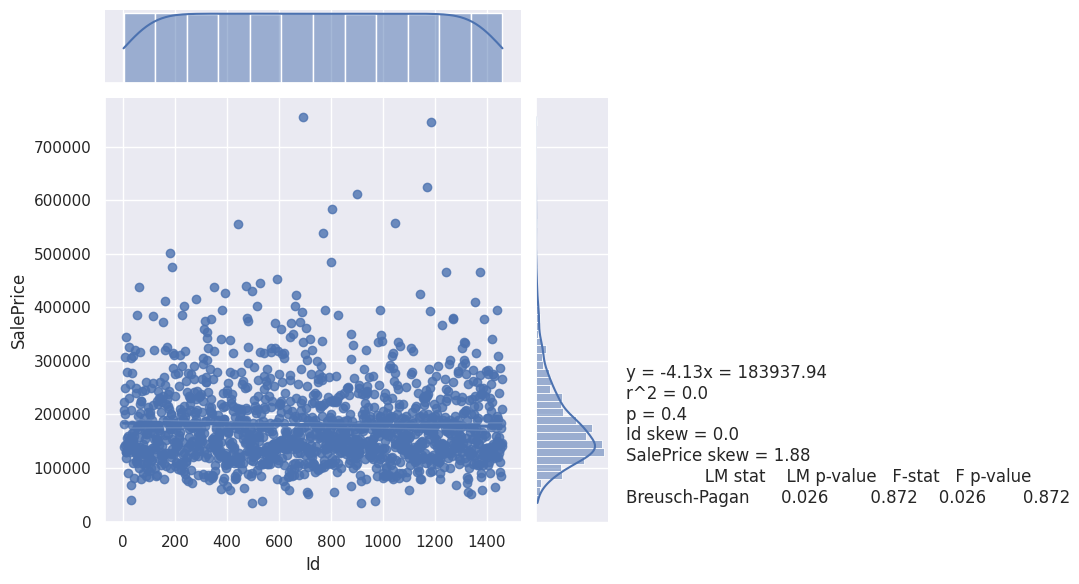

Unable to calculate white hetroscedasticity


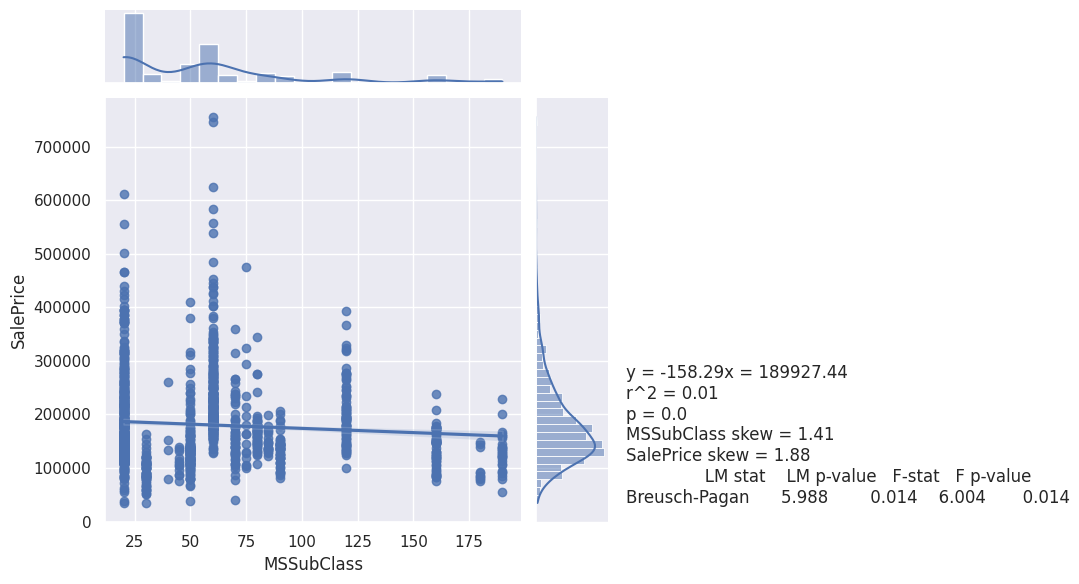

 RL n= 1151; and RM n=218; No ttest performed
 RL n= 1151; and C (all) n=10; No ttest performed
 RL n= 1151; and FV n=65; No ttest performed
 RL n= 1151; and RH n=16; No ttest performed
 RM n= 218; and C (all) n=10; No ttest performed
 RM n= 218; and FV n=65; No ttest performed
 RM n= 218; and RH n=16; No ttest performed
 C (all) n= 10; and FV n=65; No ttest performed
 C (all) n= 10; and RH n=16; No ttest performed
 FV n= 65; and RH n=16; No ttest performed


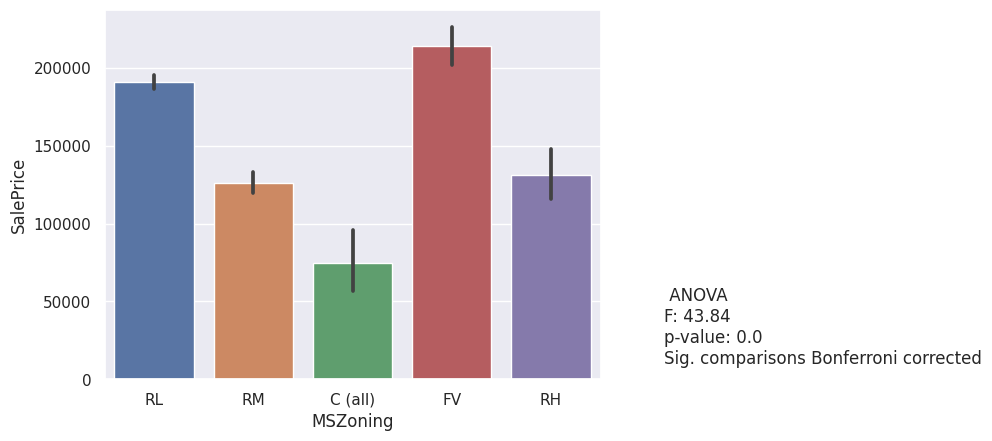

Unable to calculate white hetroscedasticity


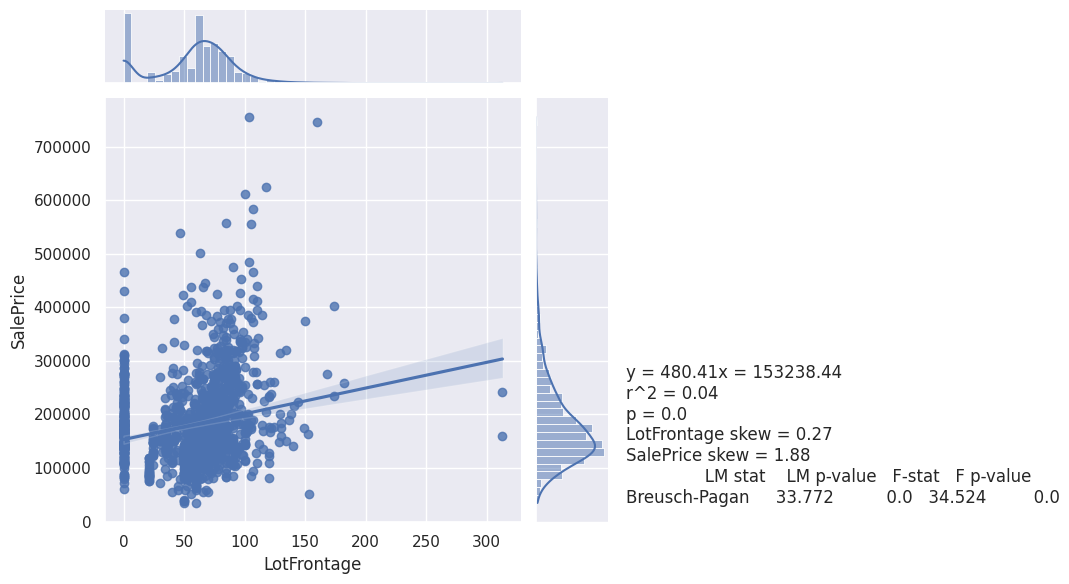

Unable to calculate white hetroscedasticity


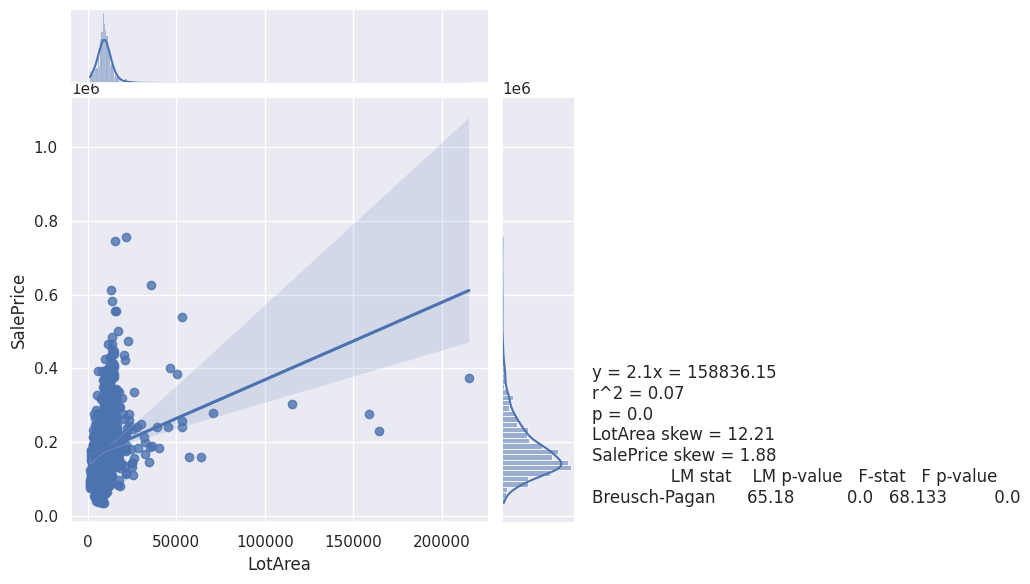

 Pave n= 1454; and Grvl n=6; No ttest performed


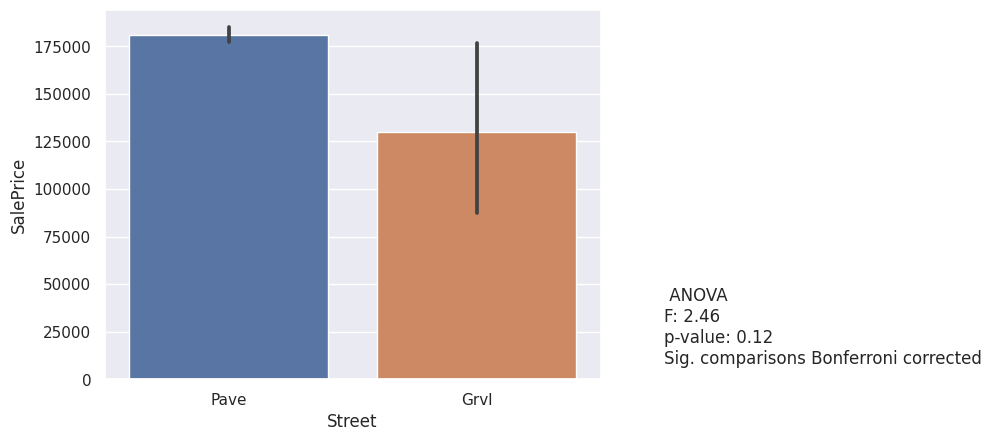

 0 n= 1369; and Grvl n=50; No ttest performed
 0 n= 1369; and Pave n=41; No ttest performed
 Grvl n= 50; and Pave n=41; No ttest performed


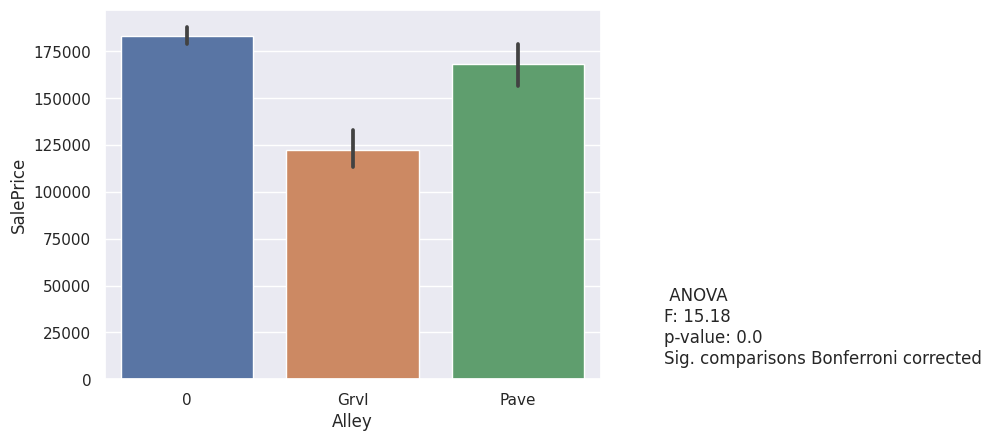

 Reg n= 925; and IR1 n=484; No ttest performed
 Reg n= 925; and IR2 n=41; No ttest performed
 Reg n= 925; and IR3 n=10; No ttest performed
 IR1 n= 484; and IR2 n=41; No ttest performed
 IR1 n= 484; and IR3 n=10; No ttest performed
 IR2 n= 41; and IR3 n=10; No ttest performed


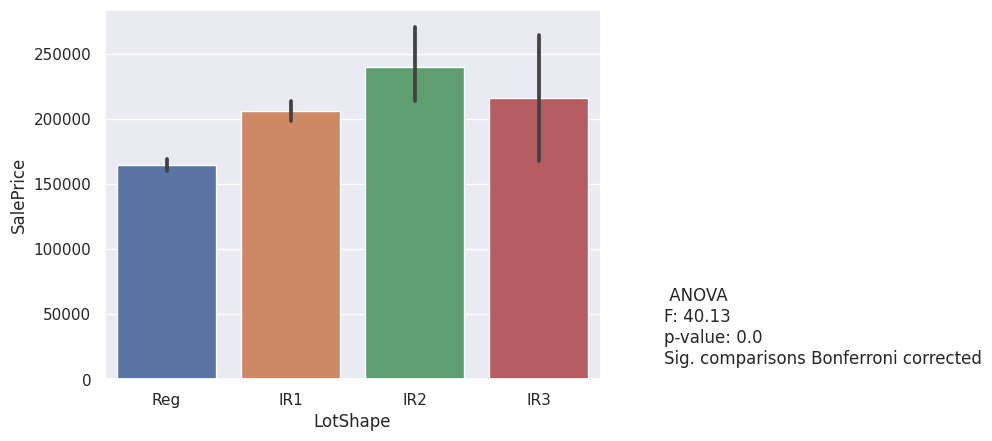

 Lvl n= 1311; and Bnk n=63; No ttest performed
 Lvl n= 1311; and Low n=36; No ttest performed
 Lvl n= 1311; and HLS n=50; No ttest performed
 Bnk n= 63; and Low n=36; No ttest performed
 Bnk n= 63; and HLS n=50; No ttest performed
 Low n= 36; and HLS n=50; No ttest performed


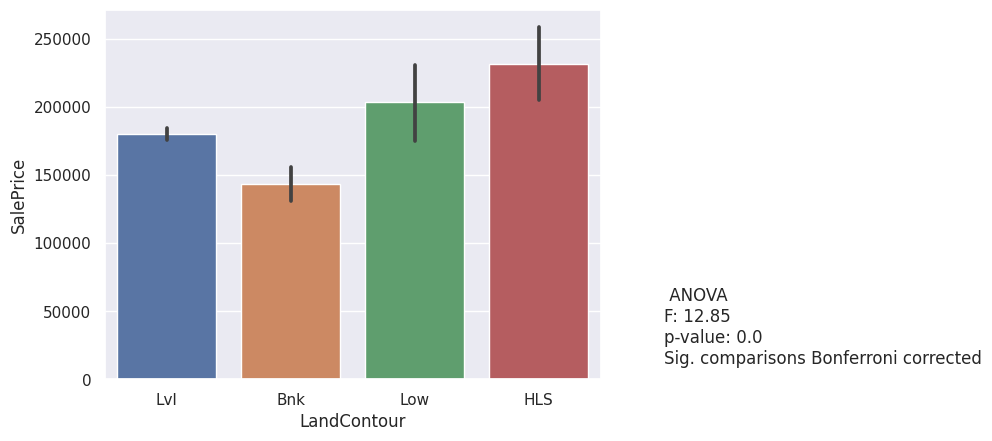

 AllPub n= 1459; and NoSeWa n=1; No ttest performed


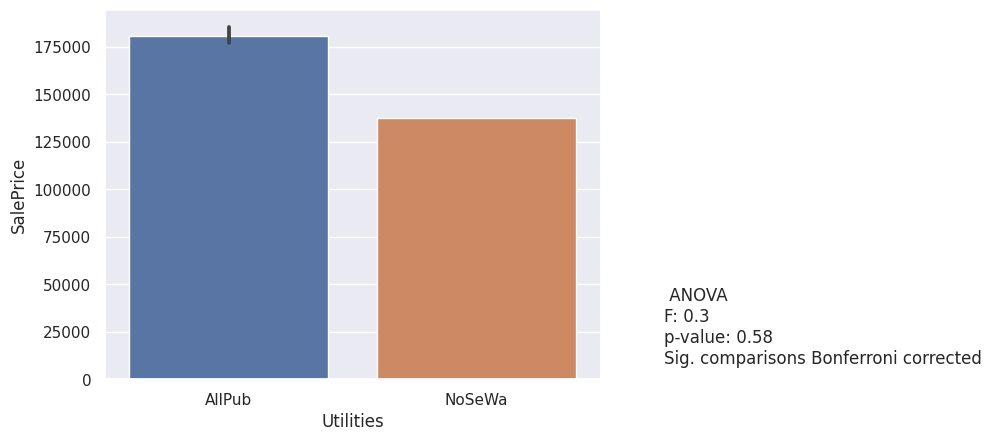

 Inside n= 1052; and FR2 n=47; No ttest performed
 Inside n= 1052; and Corner n=263; No ttest performed
 Inside n= 1052; and CulDSac n=94; No ttest performed
 Inside n= 1052; and FR3 n=4; No ttest performed
 FR2 n= 47; and Corner n=263; No ttest performed
 FR2 n= 47; and CulDSac n=94; No ttest performed
 FR2 n= 47; and FR3 n=4; No ttest performed
 Corner n= 263; and CulDSac n=94; No ttest performed
 Corner n= 263; and FR3 n=4; No ttest performed
 CulDSac n= 94; and FR3 n=4; No ttest performed


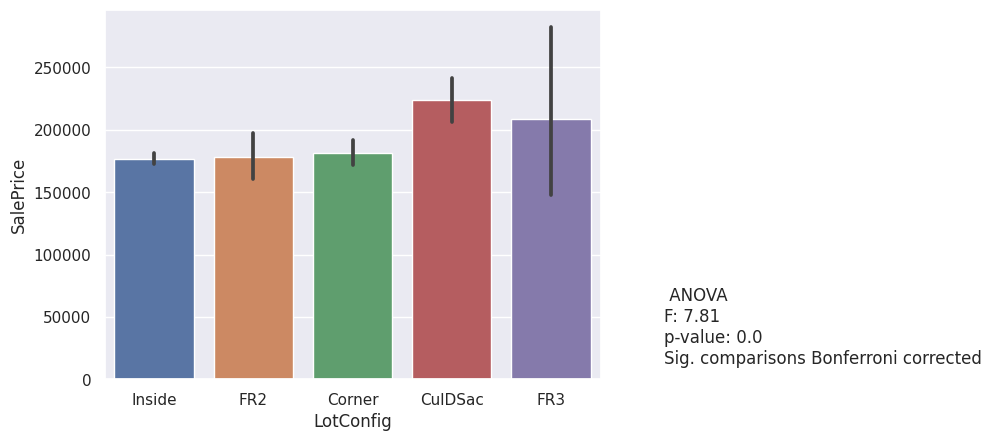

 Gtl n= 1382; and Mod n=65; No ttest performed
 Gtl n= 1382; and Sev n=13; No ttest performed
 Mod n= 65; and Sev n=13; No ttest performed


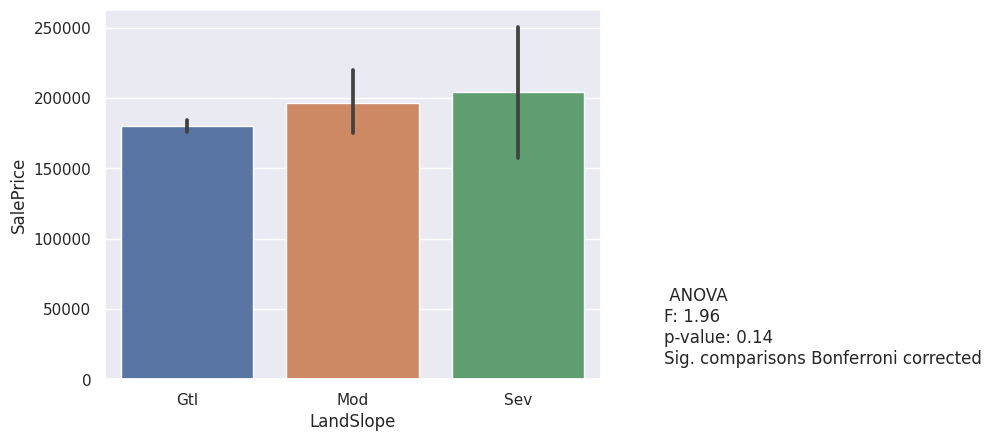

 CollgCr n= 150; and Veenker n=11; No ttest performed
 CollgCr n= 150; and Crawfor n=51; No ttest performed
 CollgCr n= 150; and NoRidge n=41; No ttest performed
 CollgCr n= 150; and Mitchel n=49; No ttest performed
 CollgCr n= 150; and Somerst n=86; No ttest performed
 CollgCr n= 150; and NWAmes n=73; No ttest performed
 CollgCr n= 150; and OldTown n=113; No ttest performed
 CollgCr n= 150; and BrkSide n=58; No ttest performed
 CollgCr n= 150; and Sawyer n=74; No ttest performed
 CollgCr n= 150; and NridgHt n=77; No ttest performed
 CollgCr n= 150; and NAmes n=225; No ttest performed
 CollgCr n= 150; and SawyerW n=59; No ttest performed
 CollgCr n= 150; and IDOTRR n=37; No ttest performed
 CollgCr n= 150; and MeadowV n=17; No ttest performed
 CollgCr n= 150; and Edwards n=100; No ttest performed
 CollgCr n= 150; and Timber n=38; No ttest performed
 CollgCr n= 150; and Gilbert n=79; No ttest performed
 CollgCr n= 150; and StoneBr n=25; No ttest performed
 CollgCr n= 150; and ClearCr n=

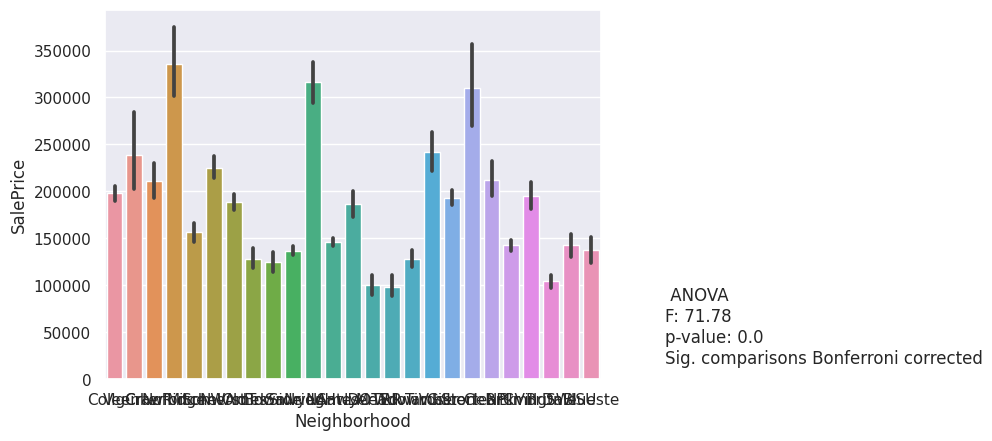

 Norm n= 1260; and Feedr n=81; No ttest performed
 Norm n= 1260; and PosN n=19; No ttest performed
 Norm n= 1260; and Artery n=48; No ttest performed
 Norm n= 1260; and RRAe n=11; No ttest performed
 Norm n= 1260; and RRNn n=5; No ttest performed
 Norm n= 1260; and RRAn n=26; No ttest performed
 Norm n= 1260; and PosA n=8; No ttest performed
 Norm n= 1260; and RRNe n=2; No ttest performed
 Feedr n= 81; and PosN n=19; No ttest performed
 Feedr n= 81; and Artery n=48; No ttest performed
 Feedr n= 81; and RRAe n=11; No ttest performed
 Feedr n= 81; and RRNn n=5; No ttest performed
 Feedr n= 81; and RRAn n=26; No ttest performed
 Feedr n= 81; and PosA n=8; No ttest performed
 Feedr n= 81; and RRNe n=2; No ttest performed
 PosN n= 19; and Artery n=48; No ttest performed
 PosN n= 19; and RRAe n=11; No ttest performed
 PosN n= 19; and RRNn n=5; No ttest performed
 PosN n= 19; and RRAn n=26; No ttest performed
 PosN n= 19; and PosA n=8; No ttest performed
 PosN n= 19; and RRNe n=2; No ttest pe

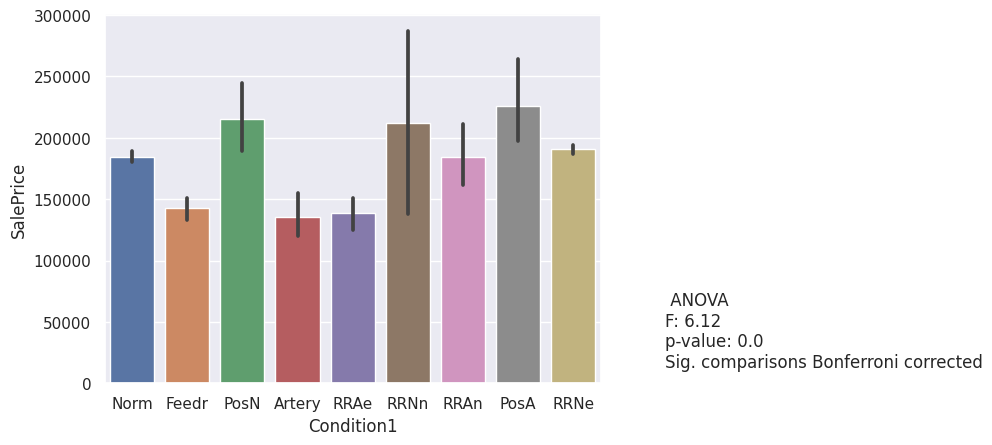

 Norm n= 1445; and Artery n=2; No ttest performed
 Norm n= 1445; and RRNn n=2; No ttest performed
 Norm n= 1445; and Feedr n=6; No ttest performed
 Norm n= 1445; and PosN n=2; No ttest performed
 Norm n= 1445; and PosA n=1; No ttest performed
 Norm n= 1445; and RRAn n=1; No ttest performed
 Norm n= 1445; and RRAe n=1; No ttest performed
 Artery n= 2; and RRNn n=2; No ttest performed
 Artery n= 2; and Feedr n=6; No ttest performed
 Artery n= 2; and PosN n=2; No ttest performed
 Artery n= 2; and PosA n=1; No ttest performed
 Artery n= 2; and RRAn n=1; No ttest performed
 Artery n= 2; and RRAe n=1; No ttest performed
 RRNn n= 2; and Feedr n=6; No ttest performed
 RRNn n= 2; and PosN n=2; No ttest performed
 RRNn n= 2; and PosA n=1; No ttest performed
 RRNn n= 2; and RRAn n=1; No ttest performed
 RRNn n= 2; and RRAe n=1; No ttest performed
 Feedr n= 6; and PosN n=2; No ttest performed
 Feedr n= 6; and PosA n=1; No ttest performed
 Feedr n= 6; and RRAn n=1; No ttest performed
 Feedr n= 6; a

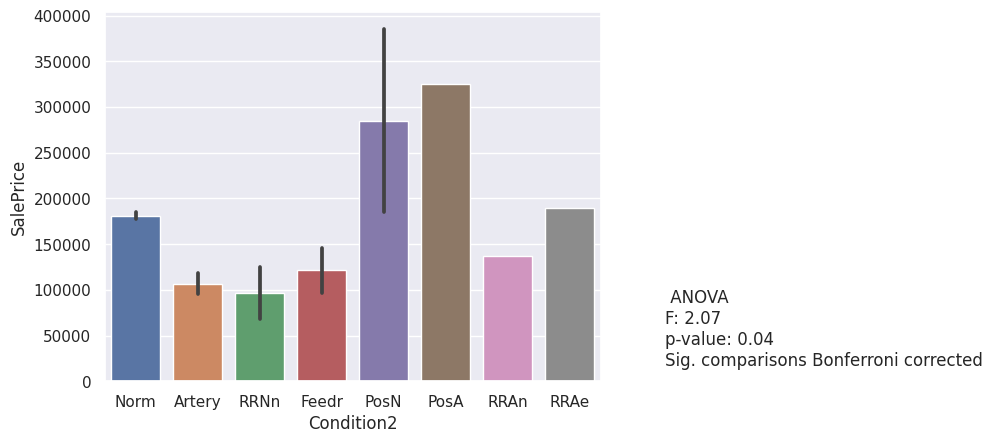

 1Fam n= 1220; and 2fmCon n=31; No ttest performed
 1Fam n= 1220; and Duplex n=52; No ttest performed
 1Fam n= 1220; and TwnhsE n=114; No ttest performed
 1Fam n= 1220; and Twnhs n=43; No ttest performed
 2fmCon n= 31; and Duplex n=52; No ttest performed
 2fmCon n= 31; and TwnhsE n=114; No ttest performed
 2fmCon n= 31; and Twnhs n=43; No ttest performed
 Duplex n= 52; and TwnhsE n=114; No ttest performed
 Duplex n= 52; and Twnhs n=43; No ttest performed
 TwnhsE n= 114; and Twnhs n=43; No ttest performed


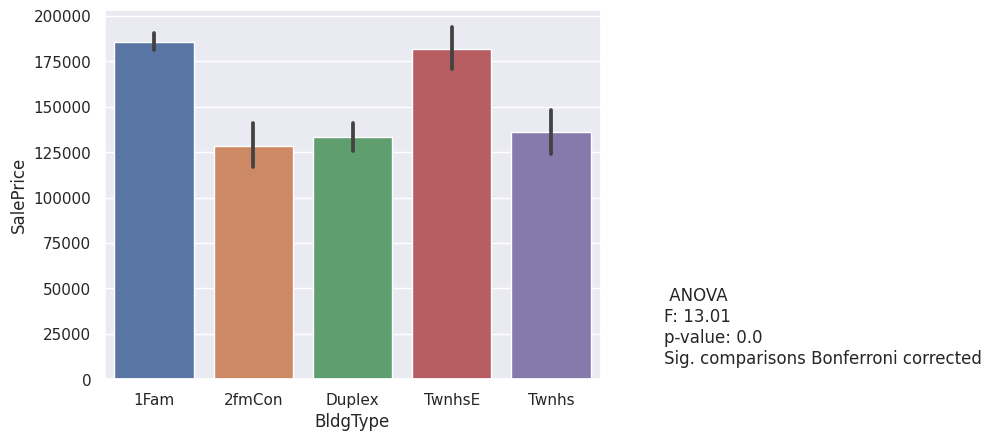

 2Story n= 445; and 1Story n=726; No ttest performed
 2Story n= 445; and 1.5Fin n=154; No ttest performed
 2Story n= 445; and 1.5Unf n=14; No ttest performed
 2Story n= 445; and SFoyer n=37; No ttest performed
 2Story n= 445; and SLvl n=65; No ttest performed
 2Story n= 445; and 2.5Unf n=11; No ttest performed
 2Story n= 445; and 2.5Fin n=8; No ttest performed
 1Story n= 726; and 1.5Fin n=154; No ttest performed
 1Story n= 726; and 1.5Unf n=14; No ttest performed
 1Story n= 726; and SFoyer n=37; No ttest performed
 1Story n= 726; and SLvl n=65; No ttest performed
 1Story n= 726; and 2.5Unf n=11; No ttest performed
 1Story n= 726; and 2.5Fin n=8; No ttest performed
 1.5Fin n= 154; and 1.5Unf n=14; No ttest performed
 1.5Fin n= 154; and SFoyer n=37; No ttest performed
 1.5Fin n= 154; and SLvl n=65; No ttest performed
 1.5Fin n= 154; and 2.5Unf n=11; No ttest performed
 1.5Fin n= 154; and 2.5Fin n=8; No ttest performed
 1.5Unf n= 14; and SFoyer n=37; No ttest performed
 1.5Unf n= 14; and 

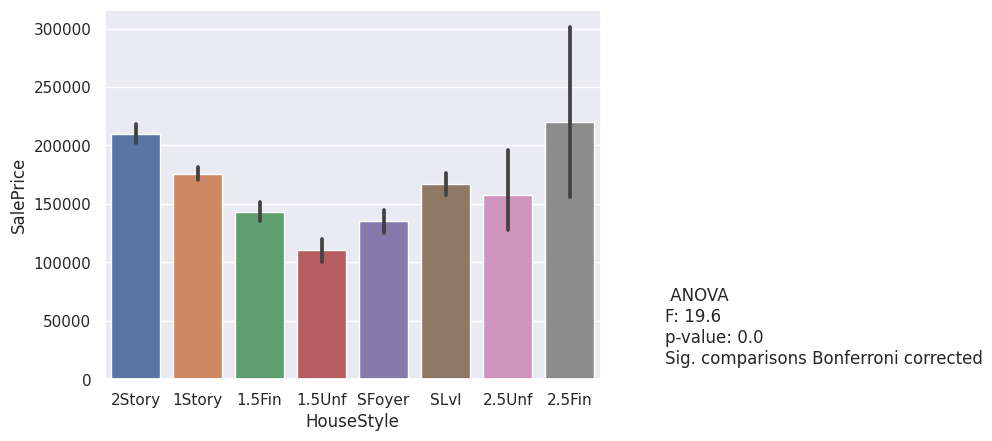

Unable to calculate white hetroscedasticity


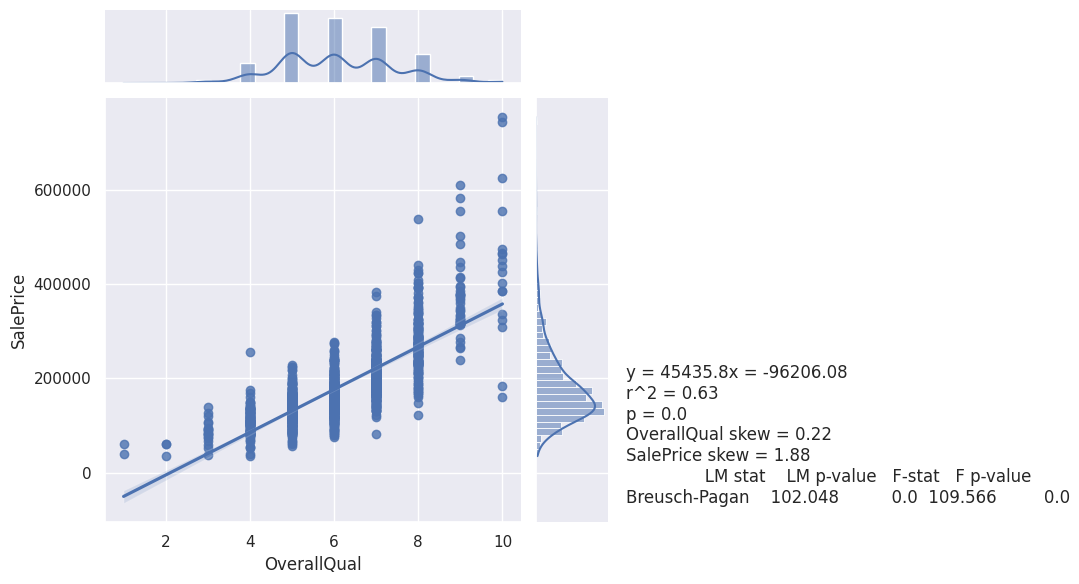

Unable to calculate white hetroscedasticity


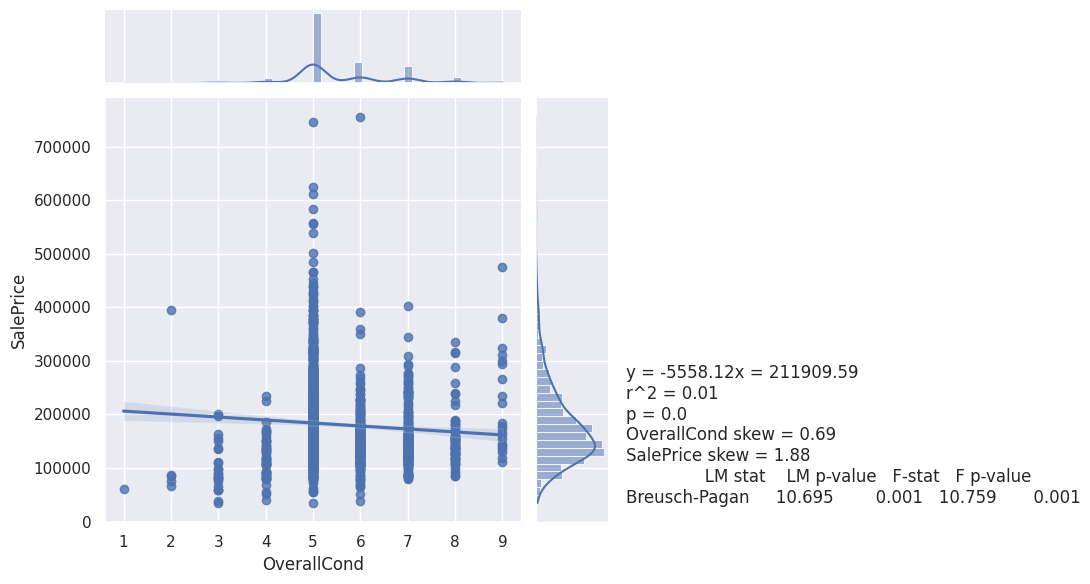

Unable to calculate white hetroscedasticity


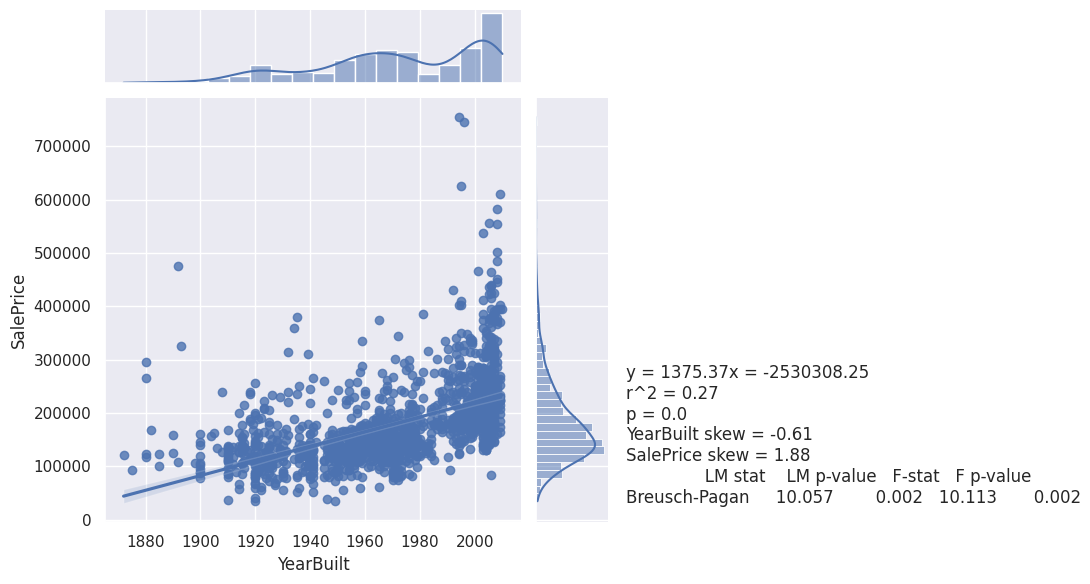

Unable to calculate white hetroscedasticity


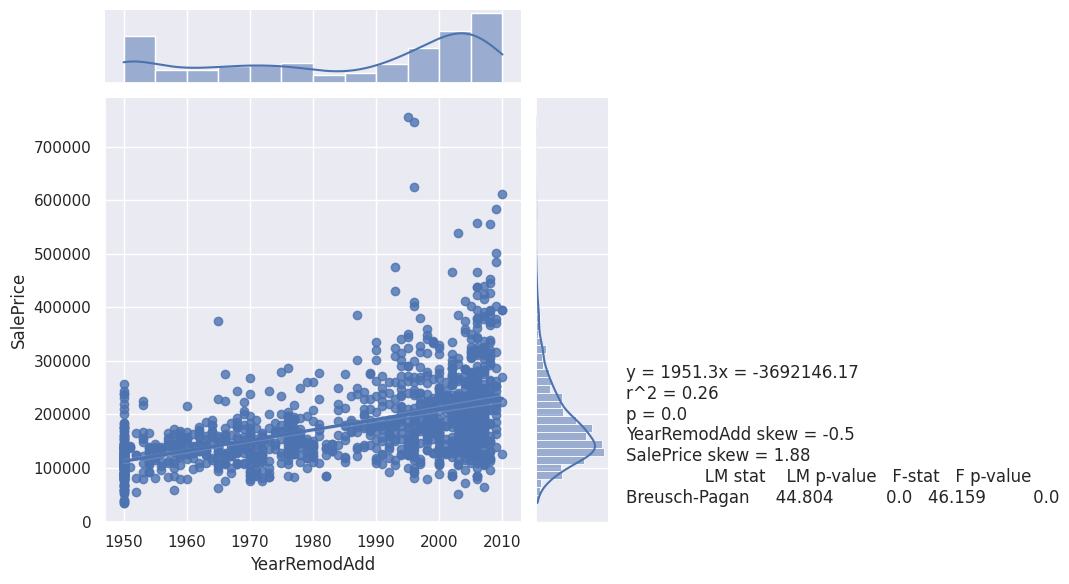

 Gable n= 1141; and Hip n=286; No ttest performed
 Gable n= 1141; and Gambrel n=11; No ttest performed
 Gable n= 1141; and Mansard n=7; No ttest performed
 Gable n= 1141; and Flat n=13; No ttest performed
 Gable n= 1141; and Shed n=2; No ttest performed
 Hip n= 286; and Gambrel n=11; No ttest performed
 Hip n= 286; and Mansard n=7; No ttest performed
 Hip n= 286; and Flat n=13; No ttest performed
 Hip n= 286; and Shed n=2; No ttest performed
 Gambrel n= 11; and Mansard n=7; No ttest performed
 Gambrel n= 11; and Flat n=13; No ttest performed
 Gambrel n= 11; and Shed n=2; No ttest performed
 Mansard n= 7; and Flat n=13; No ttest performed
 Mansard n= 7; and Shed n=2; No ttest performed
 Flat n= 13; and Shed n=2; No ttest performed


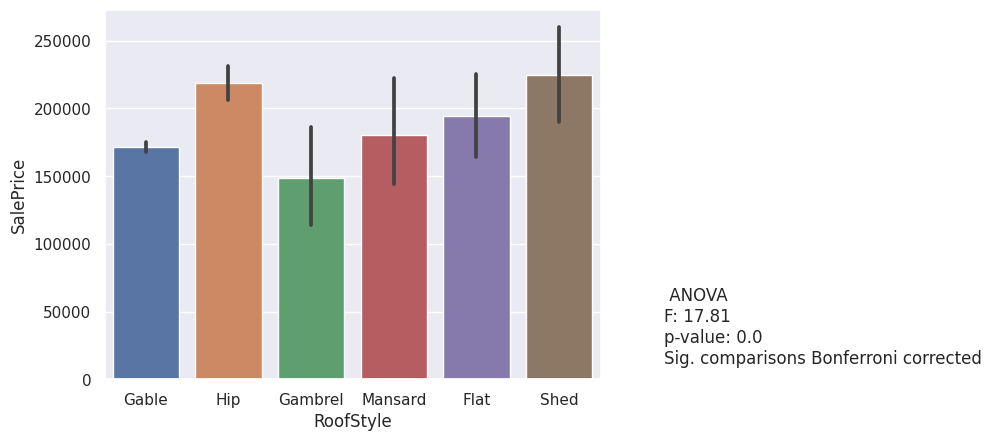

 CompShg n= 1434; and WdShngl n=6; No ttest performed
 CompShg n= 1434; and Metal n=1; No ttest performed
 CompShg n= 1434; and WdShake n=5; No ttest performed
 CompShg n= 1434; and Membran n=1; No ttest performed
 CompShg n= 1434; and Tar&Grv n=11; No ttest performed
 CompShg n= 1434; and Roll n=1; No ttest performed
 CompShg n= 1434; and ClyTile n=1; No ttest performed
 WdShngl n= 6; and Metal n=1; No ttest performed
 WdShngl n= 6; and WdShake n=5; No ttest performed
 WdShngl n= 6; and Membran n=1; No ttest performed
 WdShngl n= 6; and Tar&Grv n=11; No ttest performed
 WdShngl n= 6; and Roll n=1; No ttest performed
 WdShngl n= 6; and ClyTile n=1; No ttest performed
 Metal n= 1; and WdShake n=5; No ttest performed
 Metal n= 1; and Membran n=1; No ttest performed
 Metal n= 1; and Tar&Grv n=11; No ttest performed
 Metal n= 1; and Roll n=1; No ttest performed
 Metal n= 1; and ClyTile n=1; No ttest performed
 WdShake n= 5; and Membran n=1; No ttest performed
 WdShake n= 5; and Tar&Grv n=1

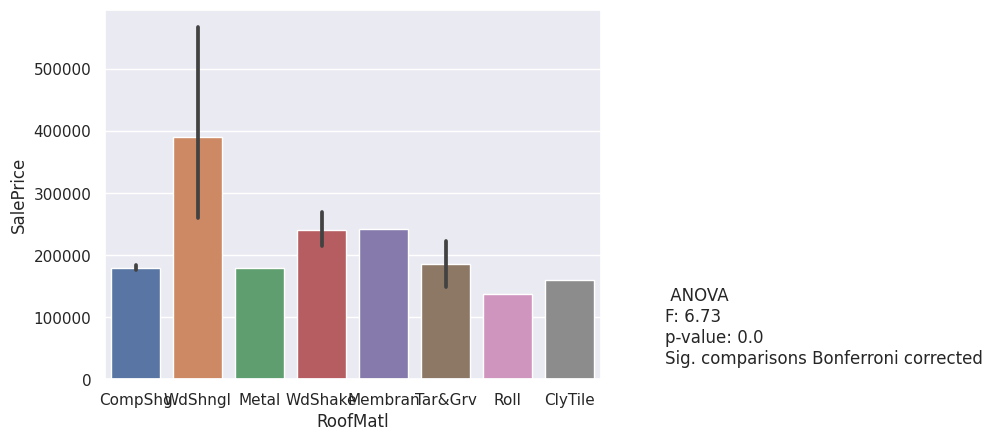

 VinylSd n= 515; and MetalSd n=220; No ttest performed
 VinylSd n= 515; and Wd Sdng n=206; No ttest performed
 VinylSd n= 515; and HdBoard n=222; No ttest performed
 VinylSd n= 515; and BrkFace n=50; No ttest performed
 VinylSd n= 515; and WdShing n=26; No ttest performed
 VinylSd n= 515; and CemntBd n=61; No ttest performed
 VinylSd n= 515; and Plywood n=108; No ttest performed
 VinylSd n= 515; and AsbShng n=20; No ttest performed
 VinylSd n= 515; and Stucco n=25; No ttest performed
 VinylSd n= 515; and BrkComm n=2; No ttest performed
 VinylSd n= 515; and AsphShn n=1; No ttest performed
 VinylSd n= 515; and Stone n=2; No ttest performed
 VinylSd n= 515; and ImStucc n=1; No ttest performed
 VinylSd n= 515; and CBlock n=1; No ttest performed
 MetalSd n= 220; and Wd Sdng n=206; No ttest performed
 MetalSd n= 220; and HdBoard n=222; No ttest performed
 MetalSd n= 220; and BrkFace n=50; No ttest performed
 MetalSd n= 220; and WdShing n=26; No ttest performed
 MetalSd n= 220; and CemntBd n=

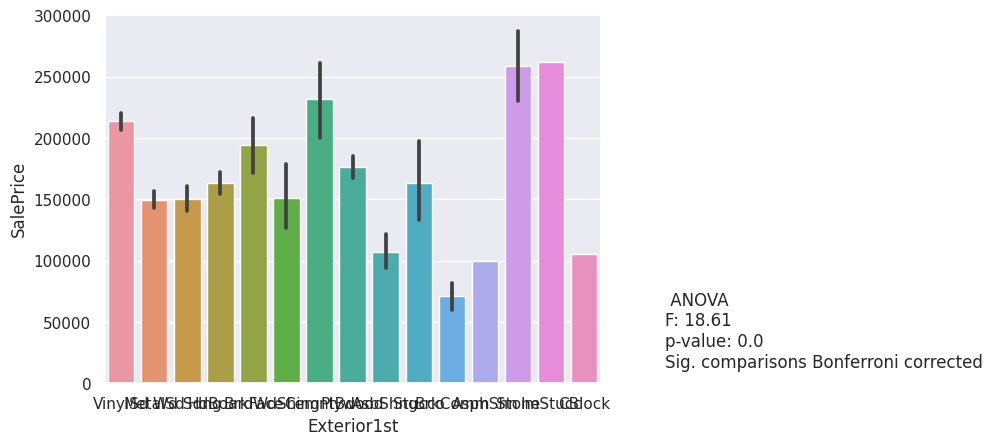

 VinylSd n= 504; and MetalSd n=214; No ttest performed
 VinylSd n= 504; and Wd Shng n=38; No ttest performed
 VinylSd n= 504; and HdBoard n=207; No ttest performed
 VinylSd n= 504; and Plywood n=142; No ttest performed
 VinylSd n= 504; and Wd Sdng n=197; No ttest performed
 VinylSd n= 504; and CmentBd n=60; No ttest performed
 VinylSd n= 504; and BrkFace n=25; No ttest performed
 VinylSd n= 504; and Stucco n=26; No ttest performed
 VinylSd n= 504; and AsbShng n=20; No ttest performed
 VinylSd n= 504; and Brk Cmn n=7; No ttest performed
 VinylSd n= 504; and ImStucc n=10; No ttest performed
 VinylSd n= 504; and AsphShn n=3; No ttest performed
 VinylSd n= 504; and Stone n=5; No ttest performed
 VinylSd n= 504; and Other n=1; No ttest performed
 VinylSd n= 504; and CBlock n=1; No ttest performed
 MetalSd n= 214; and Wd Shng n=38; No ttest performed
 MetalSd n= 214; and HdBoard n=207; No ttest performed
 MetalSd n= 214; and Plywood n=142; No ttest performed
 MetalSd n= 214; and Wd Sdng n=19

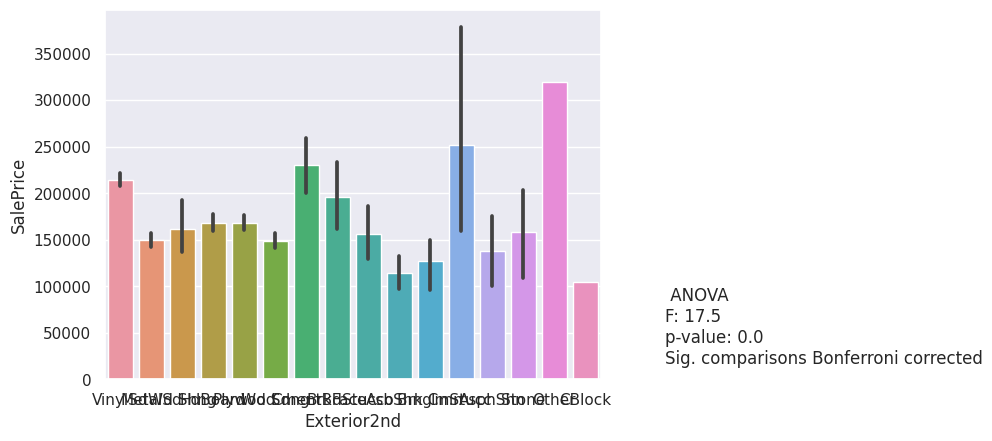

 BrkFace n= 445; and 0 n=872; No ttest performed
 BrkFace n= 445; and Stone n=128; No ttest performed
 BrkFace n= 445; and BrkCmn n=15; No ttest performed
 0 n= 872; and Stone n=128; No ttest performed
 0 n= 872; and BrkCmn n=15; No ttest performed
 Stone n= 128; and BrkCmn n=15; No ttest performed


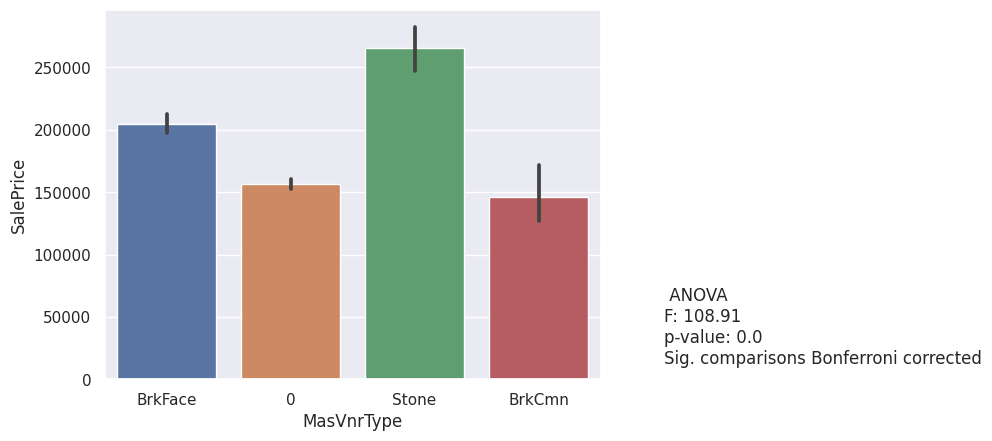

Unable to calculate white hetroscedasticity


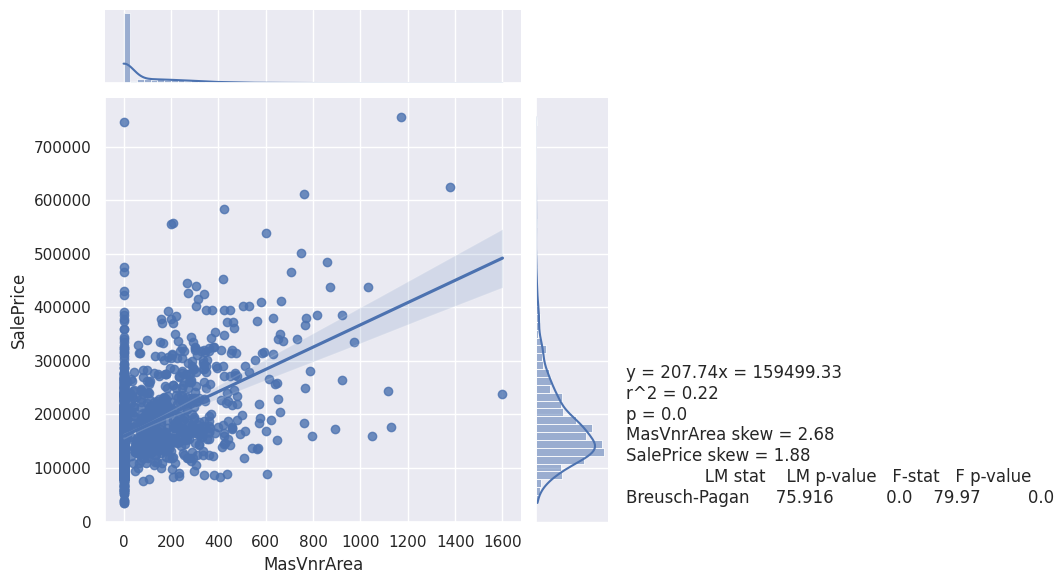

 Gd n= 488; and TA n=906; No ttest performed
 Gd n= 488; and Ex n=52; No ttest performed
 Gd n= 488; and Fa n=14; No ttest performed
 TA n= 906; and Ex n=52; No ttest performed
 TA n= 906; and Fa n=14; No ttest performed
 Ex n= 52; and Fa n=14; No ttest performed


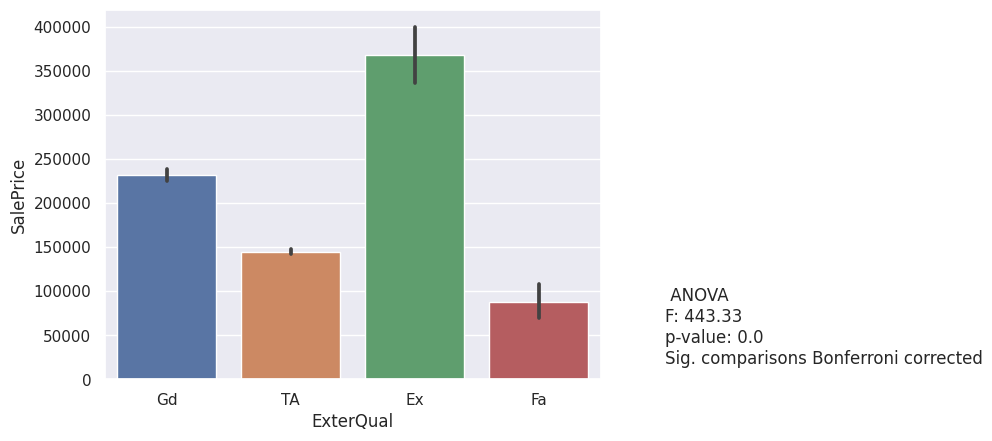

 TA n= 1282; and Gd n=146; No ttest performed
 TA n= 1282; and Fa n=28; No ttest performed
 TA n= 1282; and Po n=1; No ttest performed
 TA n= 1282; and Ex n=3; No ttest performed
 Gd n= 146; and Fa n=28; No ttest performed
 Gd n= 146; and Po n=1; No ttest performed
 Gd n= 146; and Ex n=3; No ttest performed
 Fa n= 28; and Po n=1; No ttest performed
 Fa n= 28; and Ex n=3; No ttest performed
 Po n= 1; and Ex n=3; No ttest performed


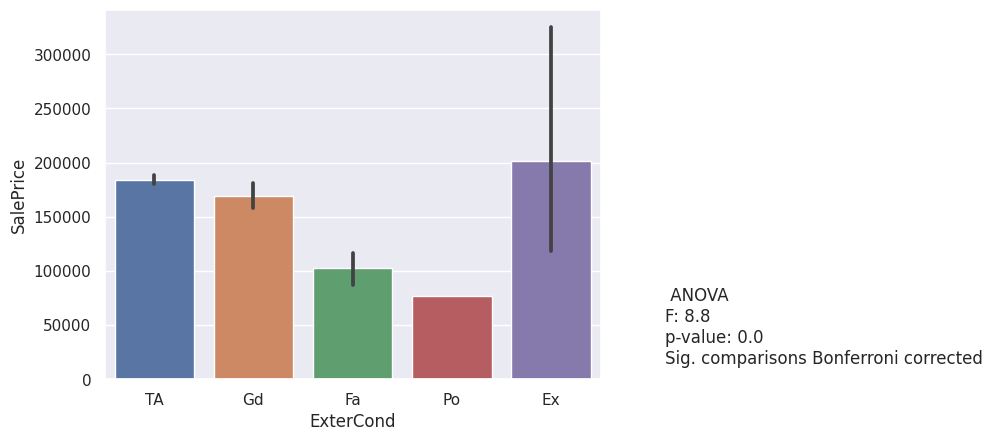

 PConc n= 647; and CBlock n=634; No ttest performed
 PConc n= 647; and BrkTil n=146; No ttest performed
 PConc n= 647; and Wood n=3; No ttest performed
 PConc n= 647; and Slab n=24; No ttest performed
 PConc n= 647; and Stone n=6; No ttest performed
 CBlock n= 634; and BrkTil n=146; No ttest performed
 CBlock n= 634; and Wood n=3; No ttest performed
 CBlock n= 634; and Slab n=24; No ttest performed
 CBlock n= 634; and Stone n=6; No ttest performed
 BrkTil n= 146; and Wood n=3; No ttest performed
 BrkTil n= 146; and Slab n=24; No ttest performed
 BrkTil n= 146; and Stone n=6; No ttest performed
 Wood n= 3; and Slab n=24; No ttest performed
 Wood n= 3; and Stone n=6; No ttest performed
 Slab n= 24; and Stone n=6; No ttest performed


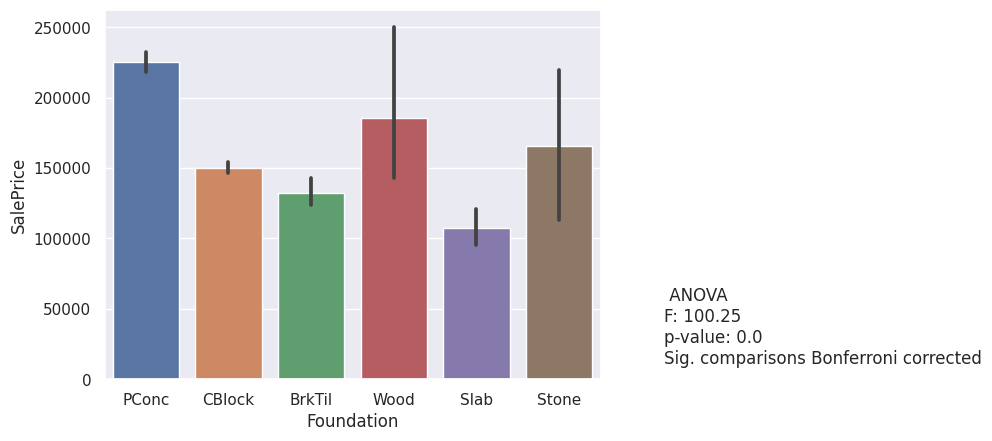

 Gd n= 618; and TA n=649; No ttest performed
 Gd n= 618; and Ex n=121; No ttest performed
 Gd n= 618; and 0 n=37; No ttest performed
 Gd n= 618; and Fa n=35; No ttest performed
 TA n= 649; and Ex n=121; No ttest performed
 TA n= 649; and 0 n=37; No ttest performed
 TA n= 649; and Fa n=35; No ttest performed
 Ex n= 121; and 0 n=37; No ttest performed
 Ex n= 121; and Fa n=35; No ttest performed
 0 n= 37; and Fa n=35; No ttest performed


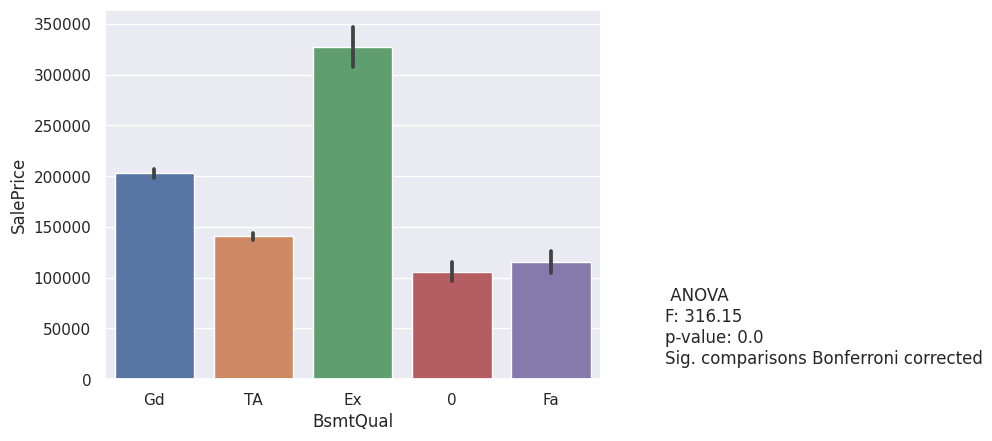

 TA n= 1311; and Gd n=65; No ttest performed
 TA n= 1311; and 0 n=37; No ttest performed
 TA n= 1311; and Fa n=45; No ttest performed
 TA n= 1311; and Po n=2; No ttest performed
 Gd n= 65; and 0 n=37; No ttest performed
 Gd n= 65; and Fa n=45; No ttest performed
 Gd n= 65; and Po n=2; No ttest performed
 0 n= 37; and Fa n=45; No ttest performed
 0 n= 37; and Po n=2; No ttest performed
 Fa n= 45; and Po n=2; No ttest performed


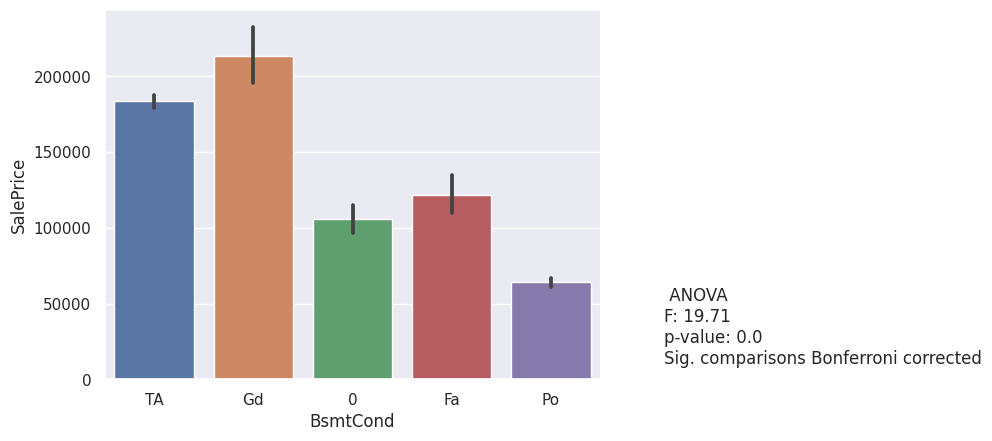

 No n= 953; and Gd n=134; No ttest performed
 No n= 953; and Mn n=114; No ttest performed
 No n= 953; and Av n=221; No ttest performed
 No n= 953; and 0 n=38; No ttest performed
 Gd n= 134; and Mn n=114; No ttest performed
 Gd n= 134; and Av n=221; No ttest performed
 Gd n= 134; and 0 n=38; No ttest performed
 Mn n= 114; and Av n=221; No ttest performed
 Mn n= 114; and 0 n=38; No ttest performed
 Av n= 221; and 0 n=38; No ttest performed


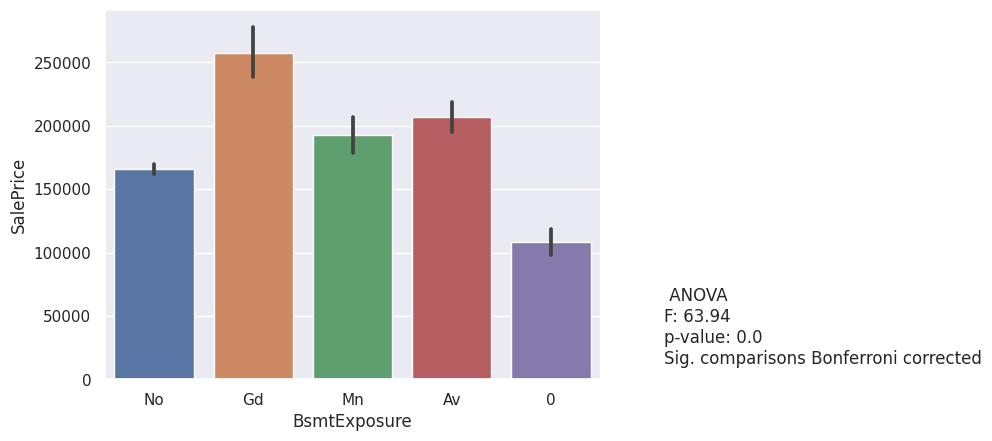

 GLQ n= 418; and ALQ n=220; No ttest performed
 GLQ n= 418; and Unf n=430; No ttest performed
 GLQ n= 418; and Rec n=133; No ttest performed
 GLQ n= 418; and BLQ n=148; No ttest performed
 GLQ n= 418; and 0 n=37; No ttest performed
 GLQ n= 418; and LwQ n=74; No ttest performed
 ALQ n= 220; and Unf n=430; No ttest performed
 ALQ n= 220; and Rec n=133; No ttest performed
 ALQ n= 220; and BLQ n=148; No ttest performed
 ALQ n= 220; and 0 n=37; No ttest performed
 ALQ n= 220; and LwQ n=74; No ttest performed
 Unf n= 430; and Rec n=133; No ttest performed
 Unf n= 430; and BLQ n=148; No ttest performed
 Unf n= 430; and 0 n=37; No ttest performed
 Unf n= 430; and LwQ n=74; No ttest performed
 Rec n= 133; and BLQ n=148; No ttest performed
 Rec n= 133; and 0 n=37; No ttest performed
 Rec n= 133; and LwQ n=74; No ttest performed
 BLQ n= 148; and 0 n=37; No ttest performed
 BLQ n= 148; and LwQ n=74; No ttest performed
 0 n= 37; and LwQ n=74; No ttest performed


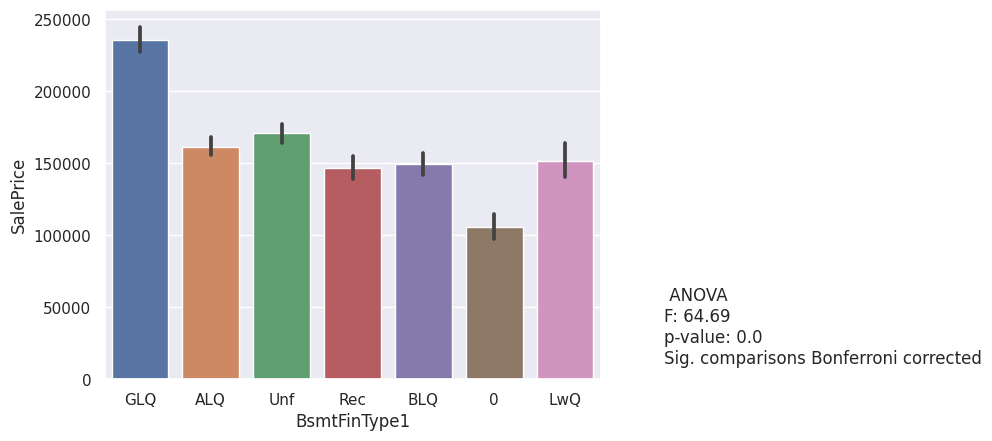

Unable to calculate white hetroscedasticity


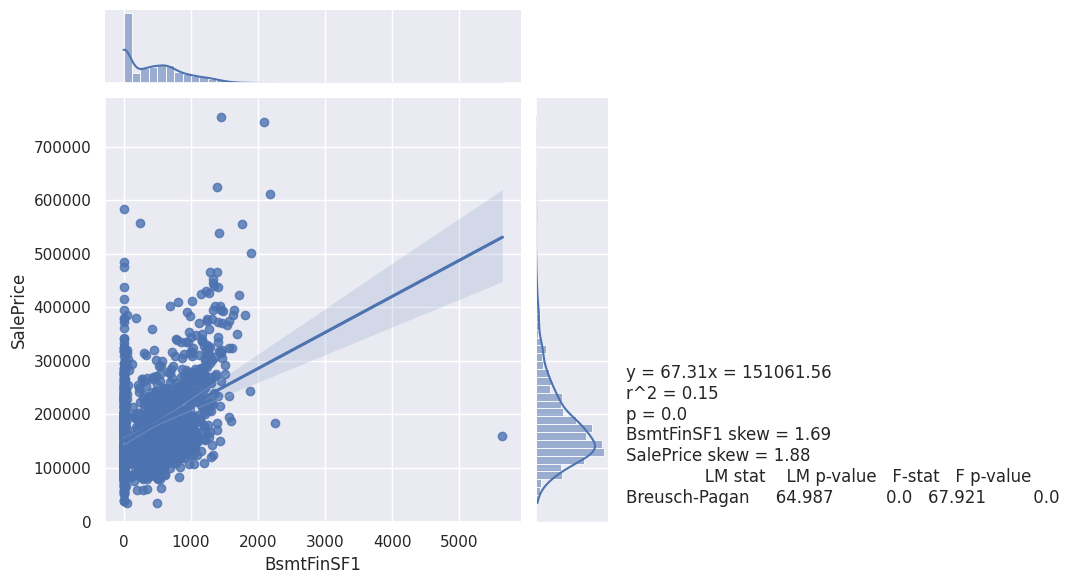

 Unf n= 1256; and BLQ n=33; No ttest performed
 Unf n= 1256; and 0 n=38; No ttest performed
 Unf n= 1256; and ALQ n=19; No ttest performed
 Unf n= 1256; and Rec n=54; No ttest performed
 Unf n= 1256; and LwQ n=46; No ttest performed
 Unf n= 1256; and GLQ n=14; No ttest performed
 BLQ n= 33; and 0 n=38; No ttest performed
 BLQ n= 33; and ALQ n=19; No ttest performed
 BLQ n= 33; and Rec n=54; No ttest performed
 BLQ n= 33; and LwQ n=46; No ttest performed
 BLQ n= 33; and GLQ n=14; No ttest performed
 0 n= 38; and ALQ n=19; No ttest performed
 0 n= 38; and Rec n=54; No ttest performed
 0 n= 38; and LwQ n=46; No ttest performed
 0 n= 38; and GLQ n=14; No ttest performed
 ALQ n= 19; and Rec n=54; No ttest performed
 ALQ n= 19; and LwQ n=46; No ttest performed
 ALQ n= 19; and GLQ n=14; No ttest performed
 Rec n= 54; and LwQ n=46; No ttest performed
 Rec n= 54; and GLQ n=14; No ttest performed
 LwQ n= 46; and GLQ n=14; No ttest performed


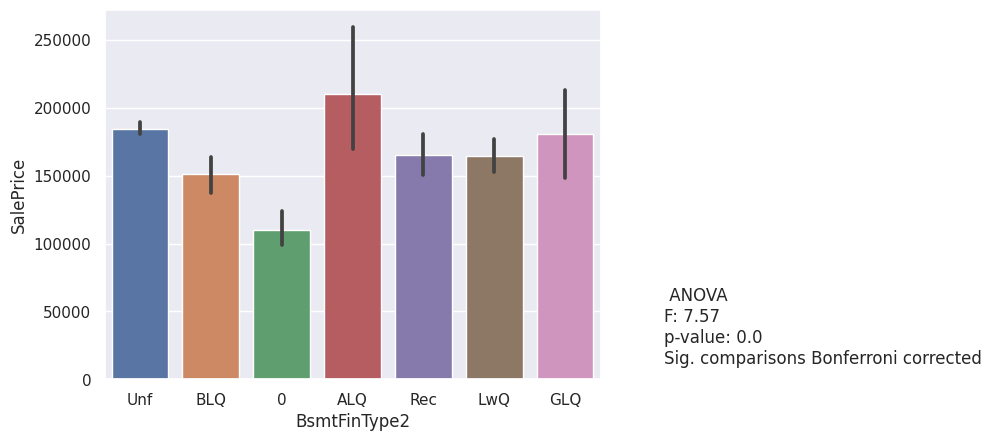

Unable to calculate white hetroscedasticity


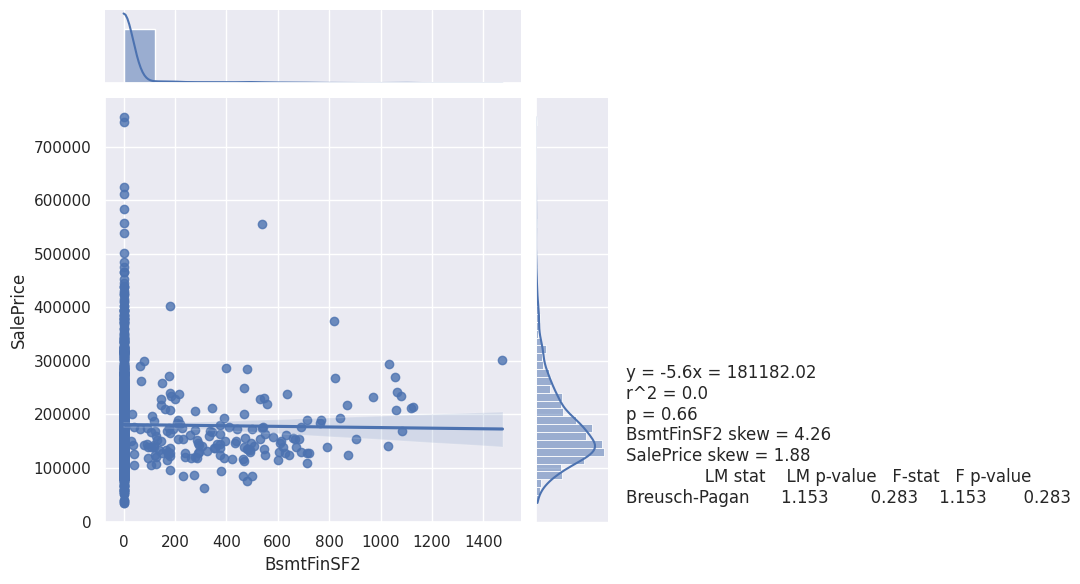

Unable to calculate white hetroscedasticity


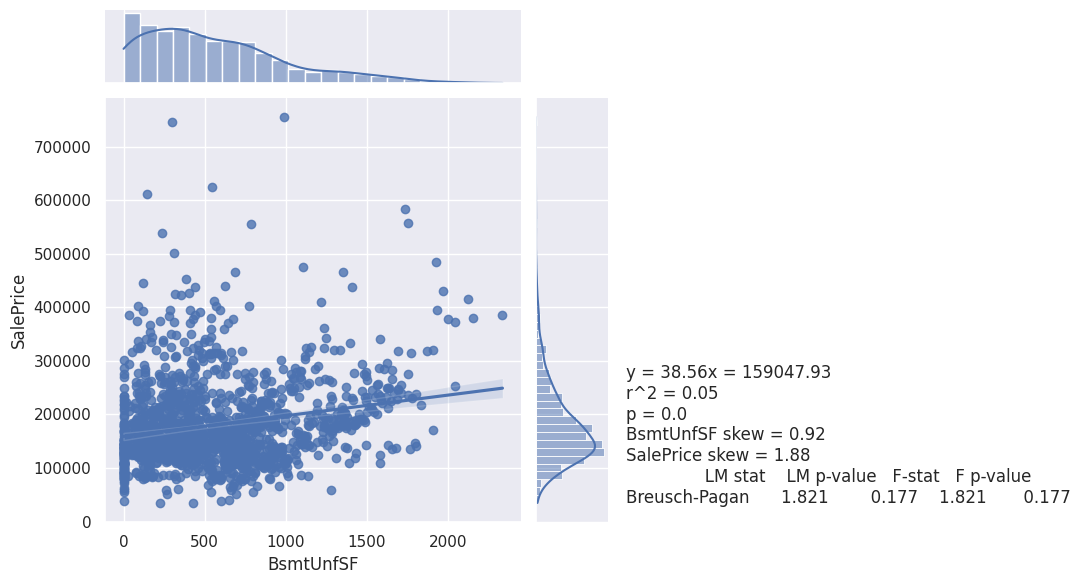

Unable to calculate white hetroscedasticity


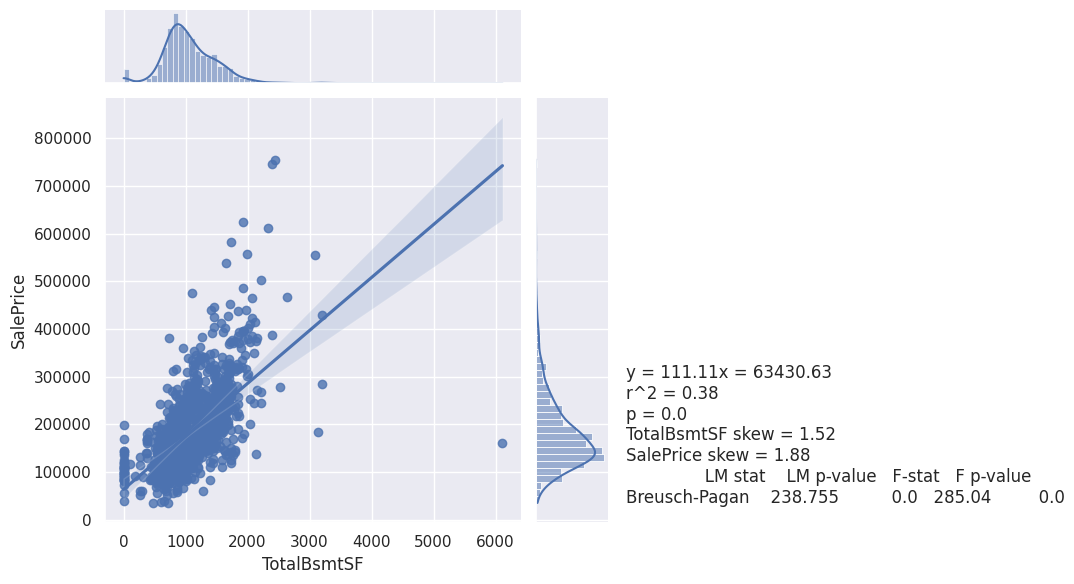

 GasA n= 1428; and GasW n=18; No ttest performed
 GasA n= 1428; and Grav n=7; No ttest performed
 GasA n= 1428; and Wall n=4; No ttest performed
 GasA n= 1428; and OthW n=2; No ttest performed
 GasA n= 1428; and Floor n=1; No ttest performed
 GasW n= 18; and Grav n=7; No ttest performed
 GasW n= 18; and Wall n=4; No ttest performed
 GasW n= 18; and OthW n=2; No ttest performed
 GasW n= 18; and Floor n=1; No ttest performed
 Grav n= 7; and Wall n=4; No ttest performed
 Grav n= 7; and OthW n=2; No ttest performed
 Grav n= 7; and Floor n=1; No ttest performed
 Wall n= 4; and OthW n=2; No ttest performed
 Wall n= 4; and Floor n=1; No ttest performed
 OthW n= 2; and Floor n=1; No ttest performed


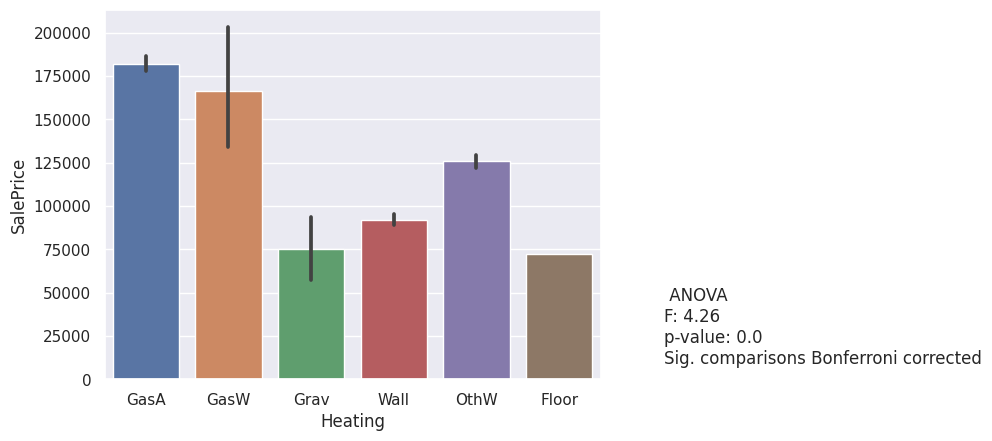

 Ex n= 741; and Gd n=241; No ttest performed
 Ex n= 741; and TA n=428; No ttest performed
 Ex n= 741; and Fa n=49; No ttest performed
 Ex n= 741; and Po n=1; No ttest performed
 Gd n= 241; and TA n=428; No ttest performed
 Gd n= 241; and Fa n=49; No ttest performed
 Gd n= 241; and Po n=1; No ttest performed
 TA n= 428; and Fa n=49; No ttest performed
 TA n= 428; and Po n=1; No ttest performed
 Fa n= 49; and Po n=1; No ttest performed


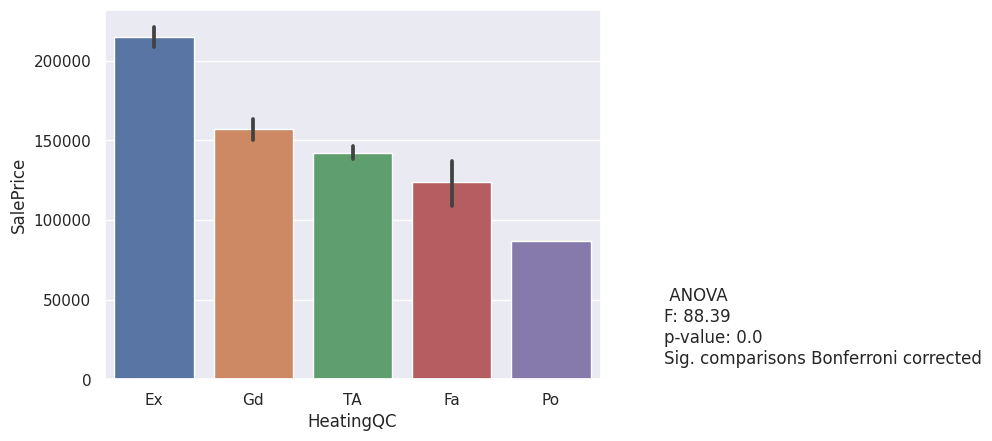

 Y n= 1365; and N n=95; No ttest performed


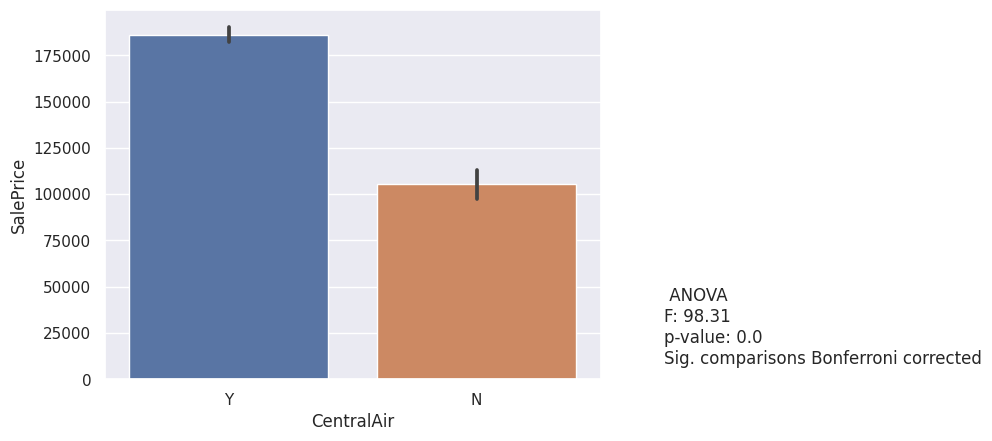

 SBrkr n= 1334; and FuseF n=27; No ttest performed
 SBrkr n= 1334; and FuseA n=94; No ttest performed
 SBrkr n= 1334; and FuseP n=3; No ttest performed
 SBrkr n= 1334; and Mix n=1; No ttest performed
 SBrkr n= 1334; and 0 n=1; No ttest performed
 FuseF n= 27; and FuseA n=94; No ttest performed
 FuseF n= 27; and FuseP n=3; No ttest performed
 FuseF n= 27; and Mix n=1; No ttest performed
 FuseF n= 27; and 0 n=1; No ttest performed
 FuseA n= 94; and FuseP n=3; No ttest performed
 FuseA n= 94; and Mix n=1; No ttest performed
 FuseA n= 94; and 0 n=1; No ttest performed
 FuseP n= 3; and Mix n=1; No ttest performed
 FuseP n= 3; and 0 n=1; No ttest performed
 Mix n= 1; and 0 n=1; No ttest performed


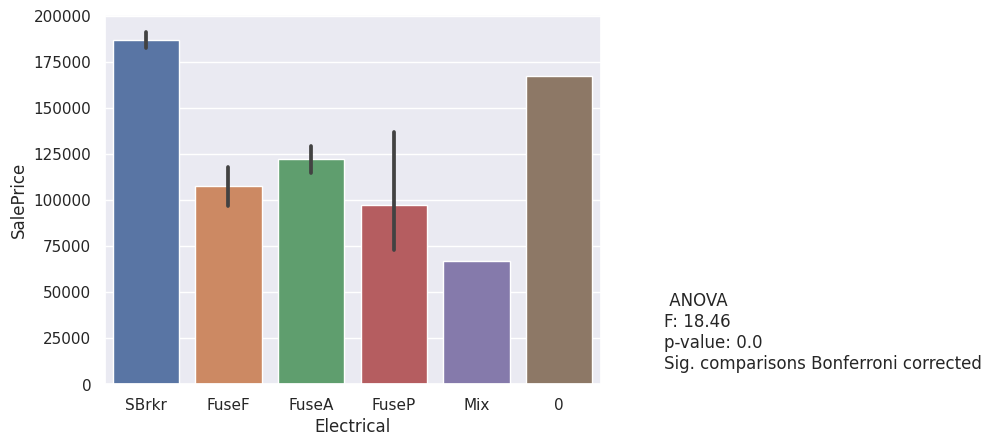

Unable to calculate white hetroscedasticity


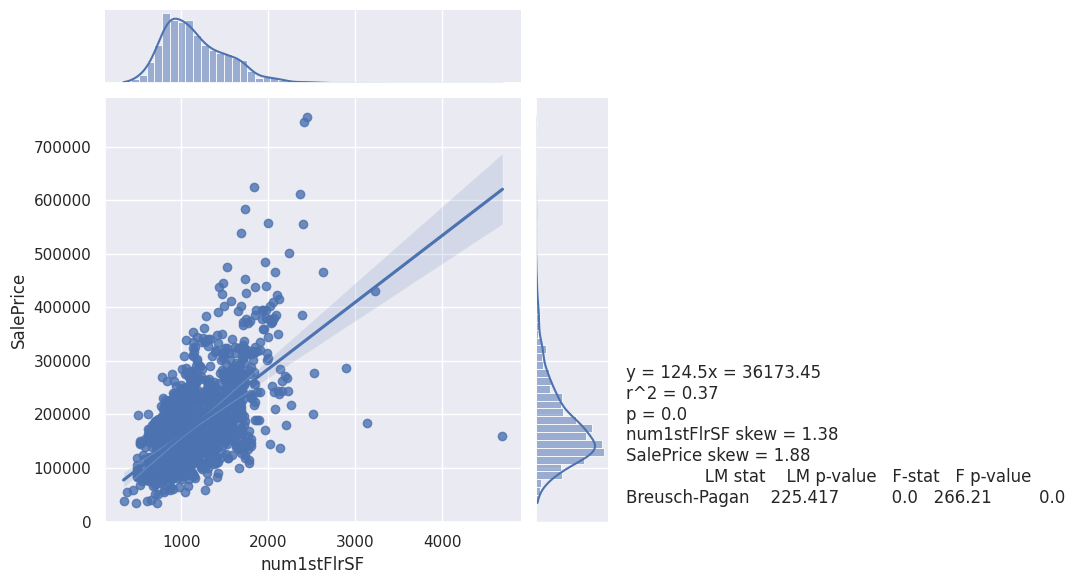

Unable to calculate white hetroscedasticity


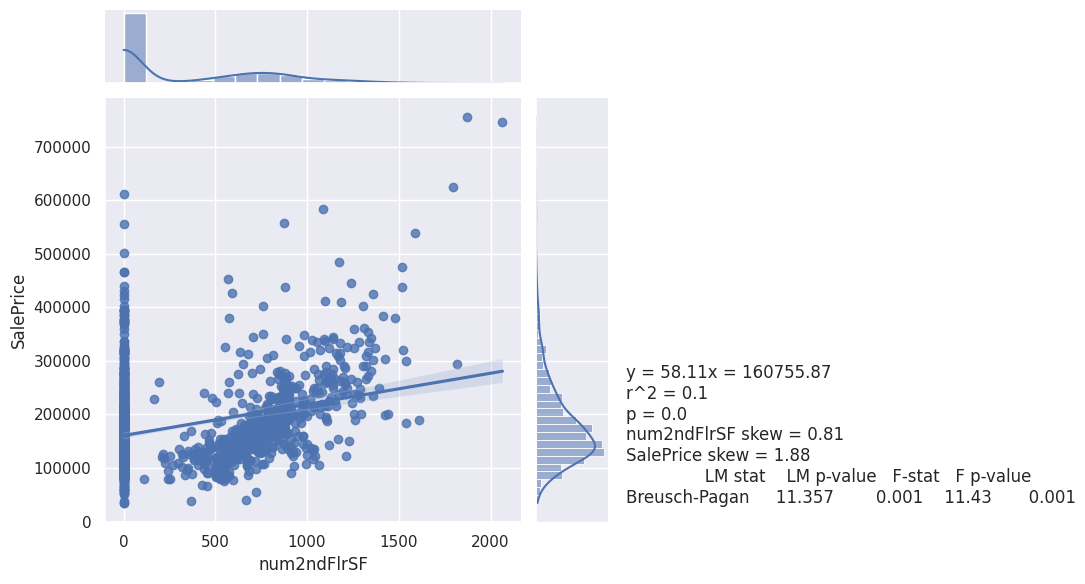

Unable to calculate white hetroscedasticity


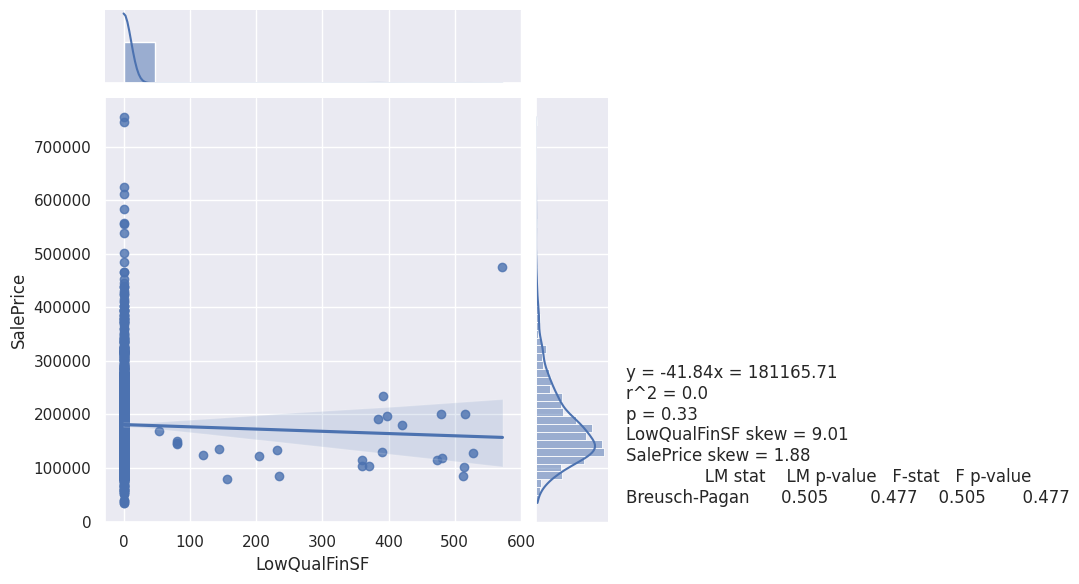

Unable to calculate white hetroscedasticity


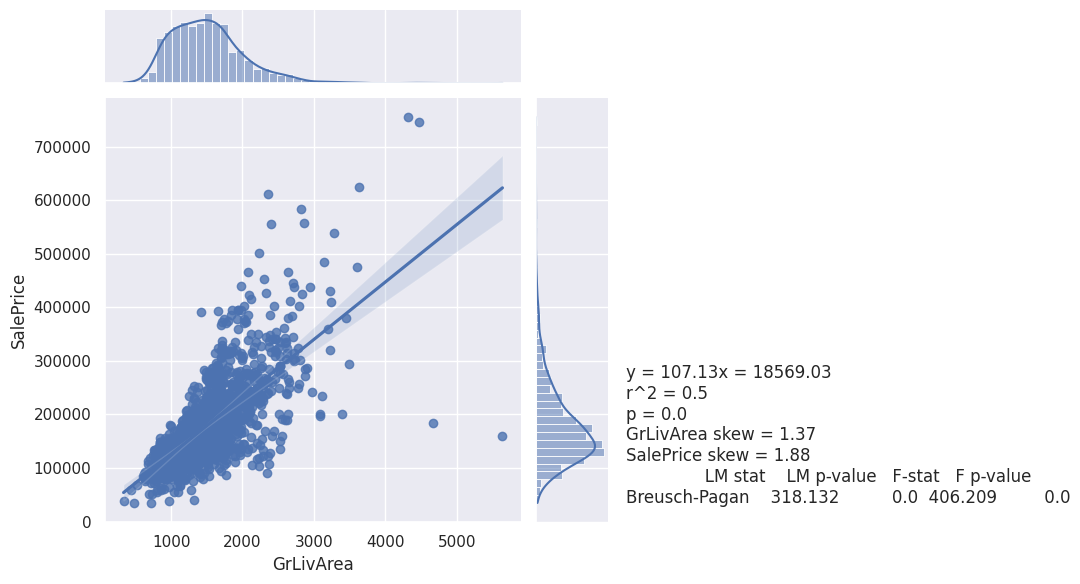

Unable to calculate white hetroscedasticity


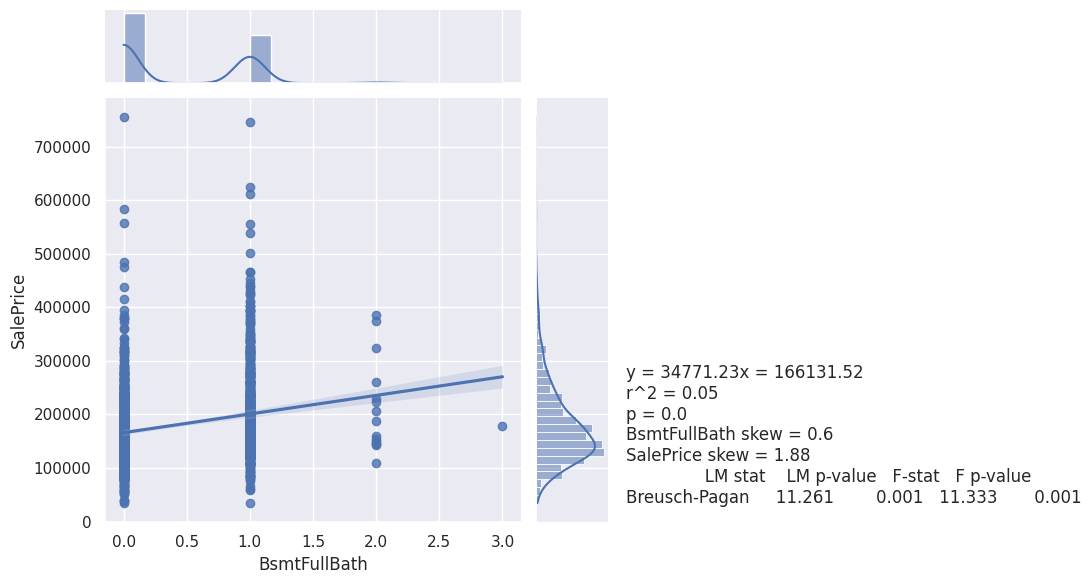

Unable to calculate white hetroscedasticity


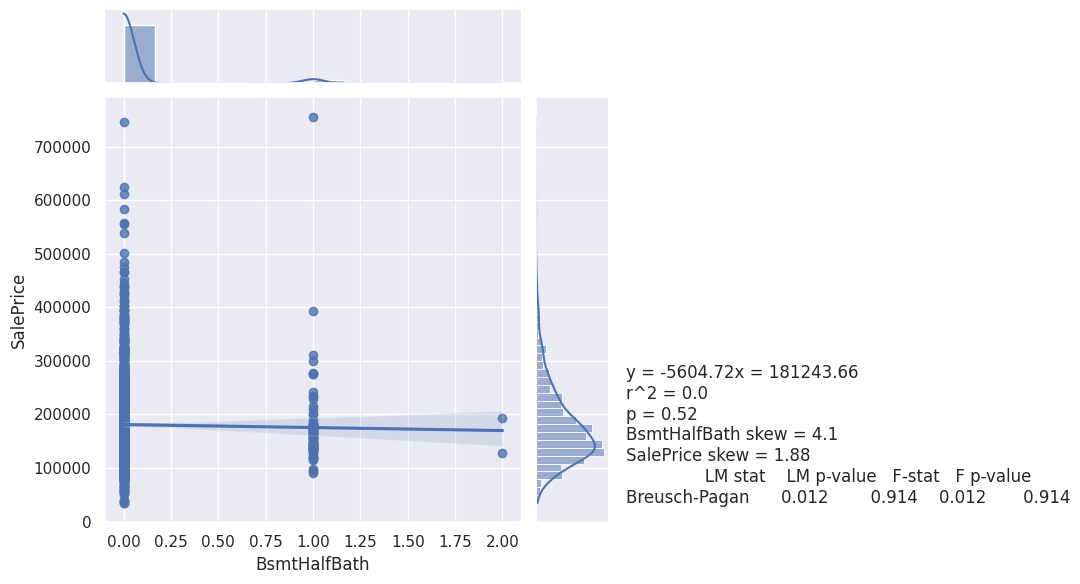

Unable to calculate white hetroscedasticity


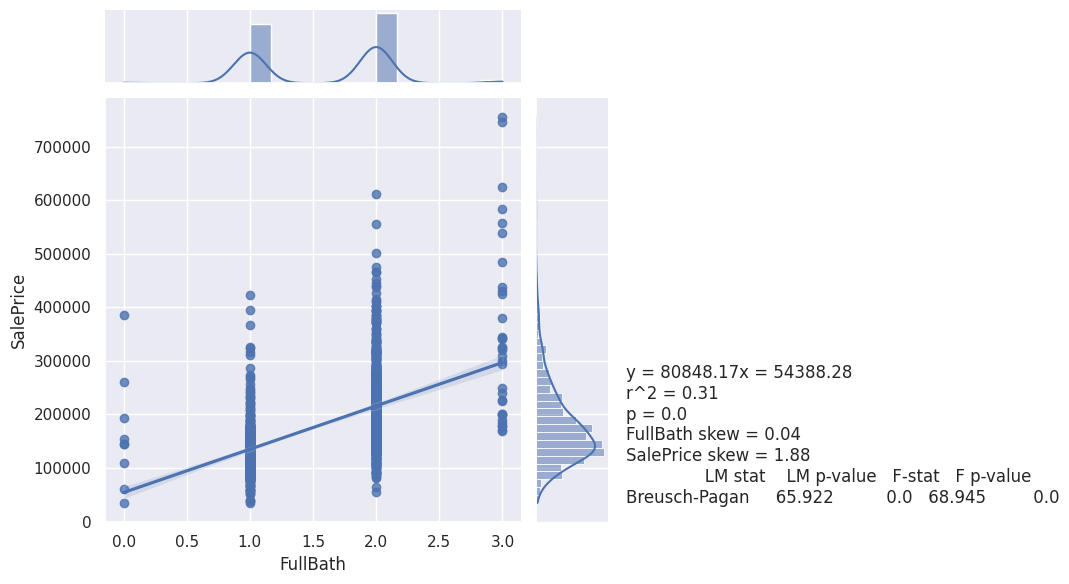

Unable to calculate white hetroscedasticity


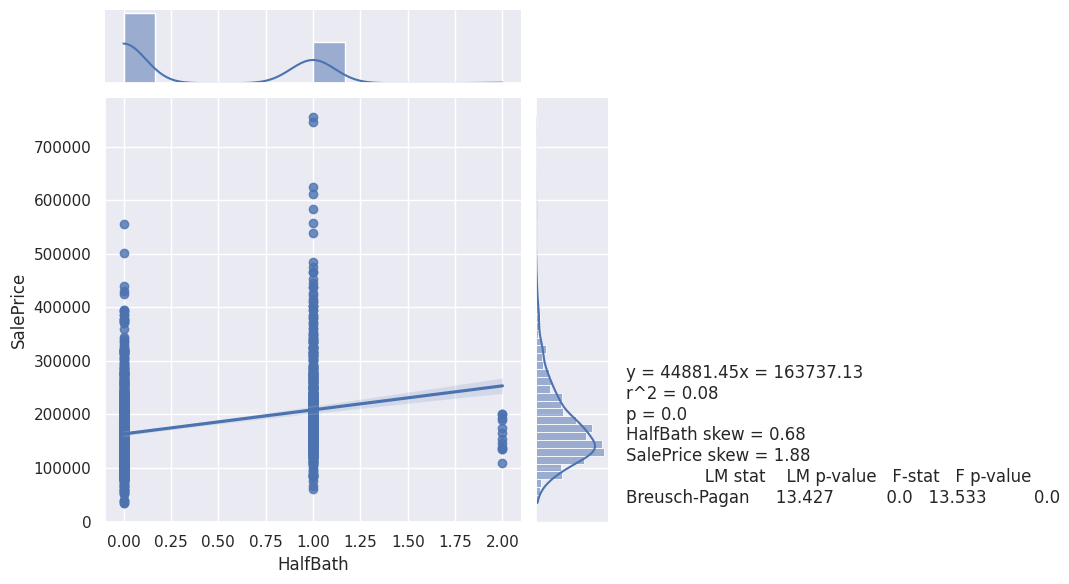

Unable to calculate white hetroscedasticity


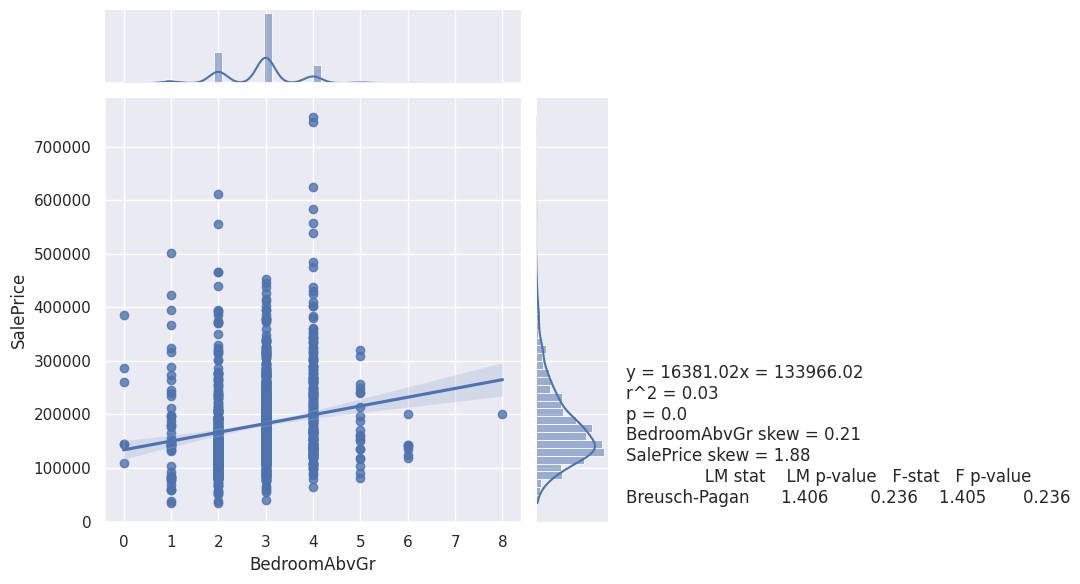

Unable to calculate white hetroscedasticity


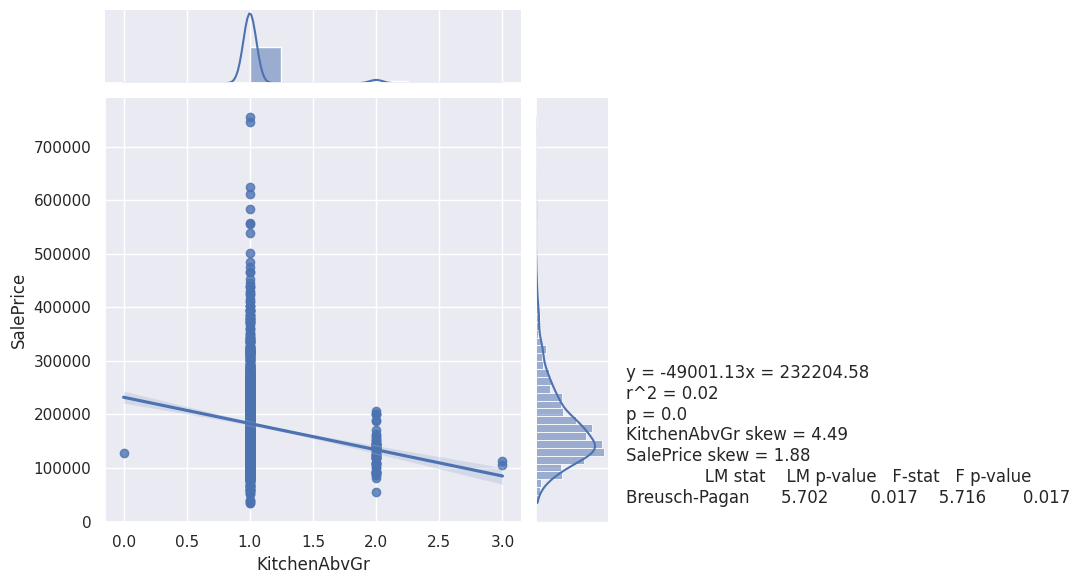

 Gd n= 586; and TA n=735; No ttest performed
 Gd n= 586; and Ex n=100; No ttest performed
 Gd n= 586; and Fa n=39; No ttest performed
 TA n= 735; and Ex n=100; No ttest performed
 TA n= 735; and Fa n=39; No ttest performed
 Ex n= 100; and Fa n=39; No ttest performed


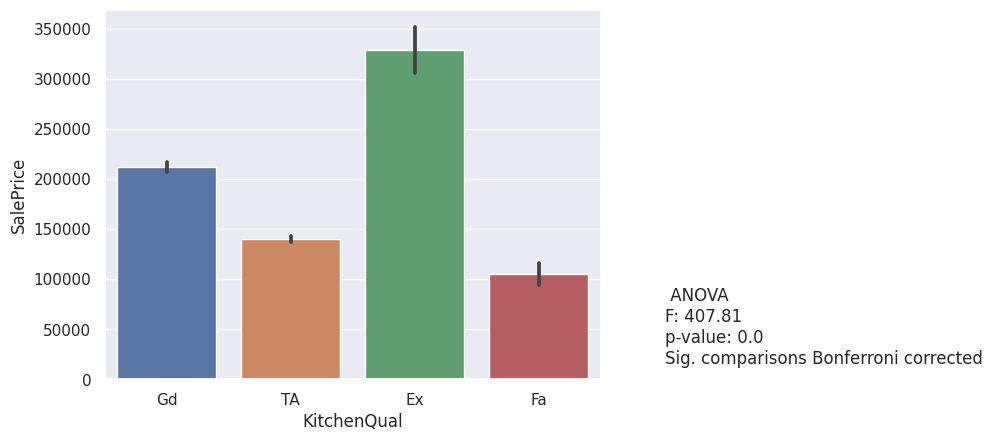

Unable to calculate white hetroscedasticity


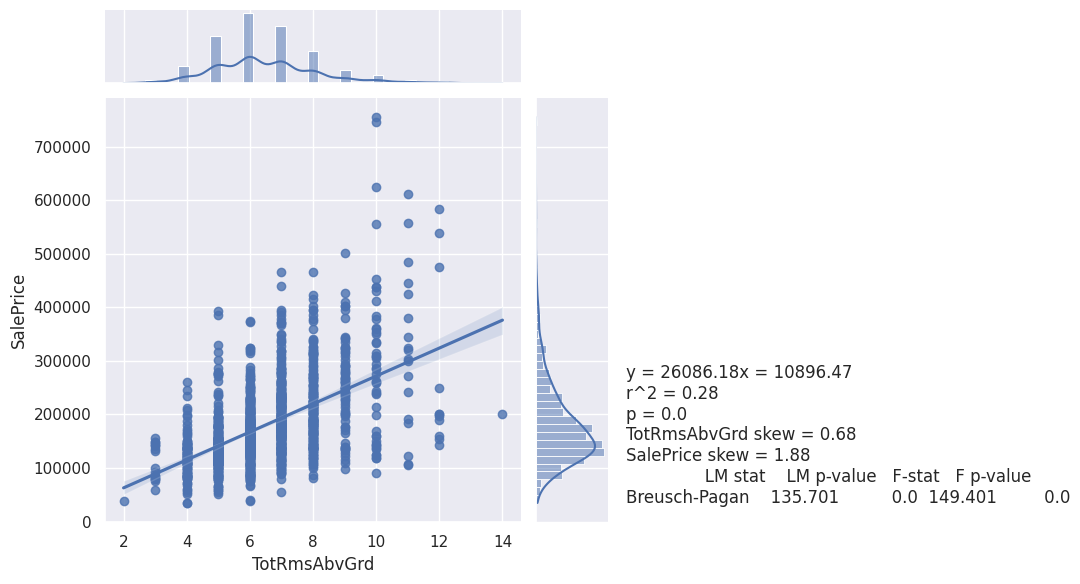

 Typ n= 1360; and Min1 n=31; No ttest performed
 Typ n= 1360; and Maj1 n=14; No ttest performed
 Typ n= 1360; and Min2 n=34; No ttest performed
 Typ n= 1360; and Mod n=15; No ttest performed
 Typ n= 1360; and Maj2 n=5; No ttest performed
 Typ n= 1360; and Sev n=1; No ttest performed
 Min1 n= 31; and Maj1 n=14; No ttest performed
 Min1 n= 31; and Min2 n=34; No ttest performed
 Min1 n= 31; and Mod n=15; No ttest performed
 Min1 n= 31; and Maj2 n=5; No ttest performed
 Min1 n= 31; and Sev n=1; No ttest performed
 Maj1 n= 14; and Min2 n=34; No ttest performed
 Maj1 n= 14; and Mod n=15; No ttest performed
 Maj1 n= 14; and Maj2 n=5; No ttest performed
 Maj1 n= 14; and Sev n=1; No ttest performed
 Min2 n= 34; and Mod n=15; No ttest performed
 Min2 n= 34; and Maj2 n=5; No ttest performed
 Min2 n= 34; and Sev n=1; No ttest performed
 Mod n= 15; and Maj2 n=5; No ttest performed
 Mod n= 15; and Sev n=1; No ttest performed
 Maj2 n= 5; and Sev n=1; No ttest performed


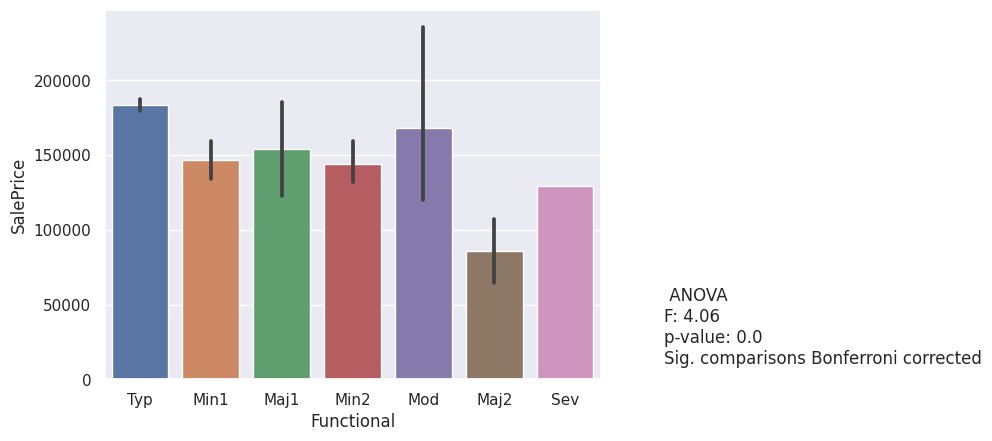

Unable to calculate white hetroscedasticity


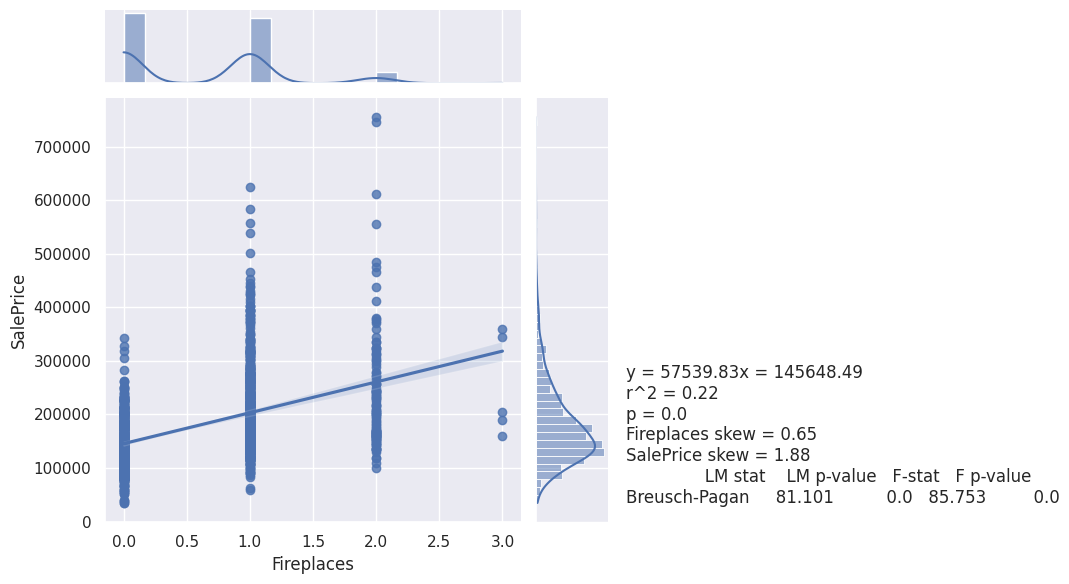

 0 n= 690; and TA n=313; No ttest performed
 0 n= 690; and Gd n=380; No ttest performed
 0 n= 690; and Fa n=33; No ttest performed
 0 n= 690; and Ex n=24; No ttest performed
 0 n= 690; and Po n=20; No ttest performed
 TA n= 313; and Gd n=380; No ttest performed
 TA n= 313; and Fa n=33; No ttest performed
 TA n= 313; and Ex n=24; No ttest performed
 TA n= 313; and Po n=20; No ttest performed
 Gd n= 380; and Fa n=33; No ttest performed
 Gd n= 380; and Ex n=24; No ttest performed
 Gd n= 380; and Po n=20; No ttest performed
 Fa n= 33; and Ex n=24; No ttest performed
 Fa n= 33; and Po n=20; No ttest performed
 Ex n= 24; and Po n=20; No ttest performed


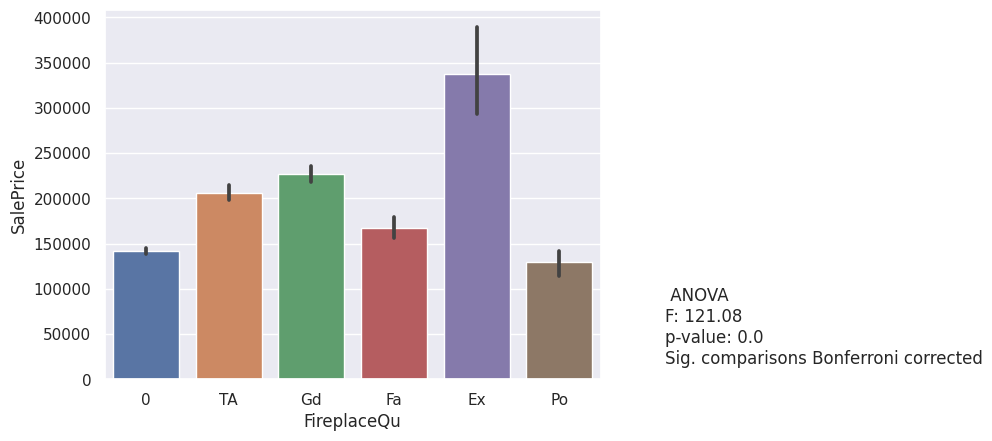

 Attchd n= 870; and Detchd n=387; No ttest performed
 Attchd n= 870; and BuiltIn n=88; No ttest performed
 Attchd n= 870; and CarPort n=9; No ttest performed
 Attchd n= 870; and 0 n=81; No ttest performed
 Attchd n= 870; and Basment n=19; No ttest performed
 Attchd n= 870; and 2Types n=6; No ttest performed
 Detchd n= 387; and BuiltIn n=88; No ttest performed
 Detchd n= 387; and CarPort n=9; No ttest performed
 Detchd n= 387; and 0 n=81; No ttest performed
 Detchd n= 387; and Basment n=19; No ttest performed
 Detchd n= 387; and 2Types n=6; No ttest performed
 BuiltIn n= 88; and CarPort n=9; No ttest performed
 BuiltIn n= 88; and 0 n=81; No ttest performed
 BuiltIn n= 88; and Basment n=19; No ttest performed
 BuiltIn n= 88; and 2Types n=6; No ttest performed
 CarPort n= 9; and 0 n=81; No ttest performed
 CarPort n= 9; and Basment n=19; No ttest performed
 CarPort n= 9; and 2Types n=6; No ttest performed
 0 n= 81; and Basment n=19; No ttest performed
 0 n= 81; and 2Types n=6; No ttest pe

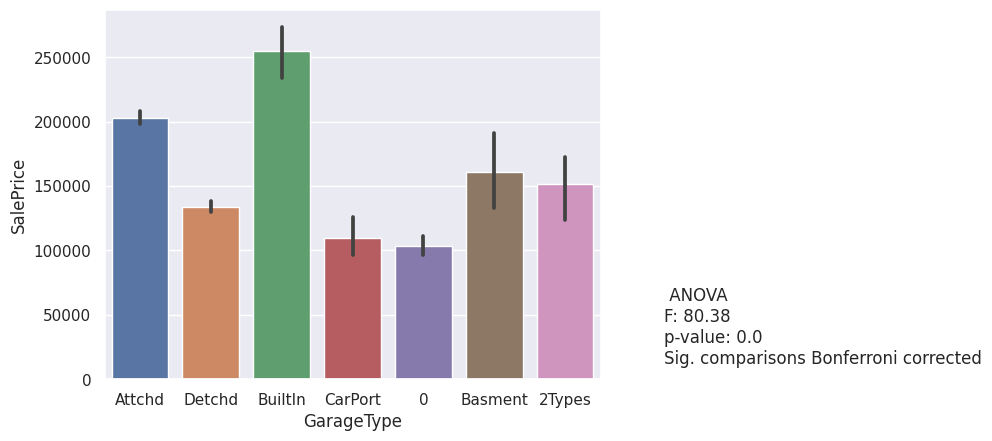

Unable to calculate white hetroscedasticity


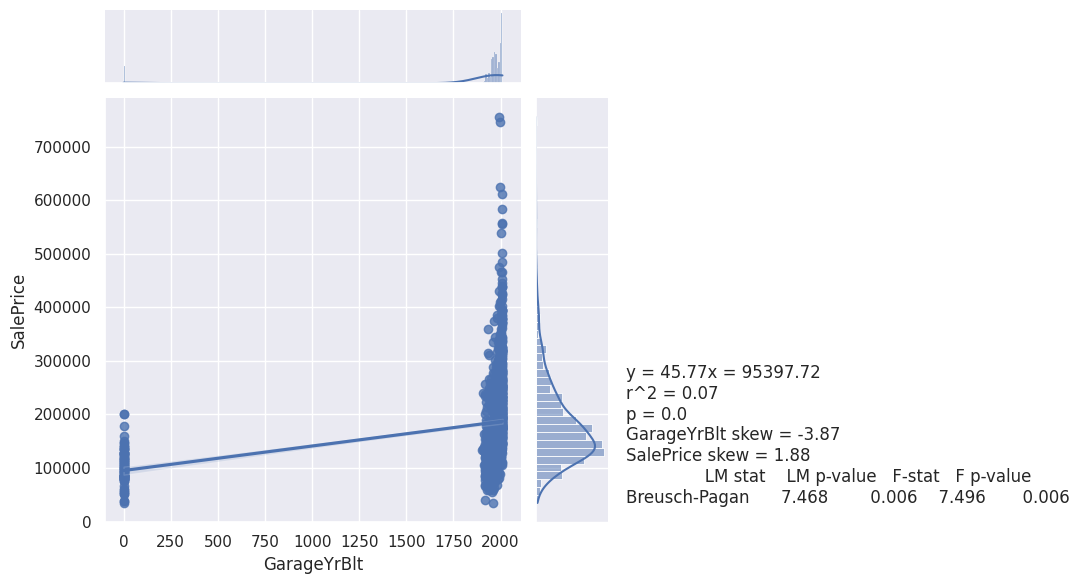

 RFn n= 422; and Unf n=605; No ttest performed
 RFn n= 422; and Fin n=352; No ttest performed
 RFn n= 422; and 0 n=81; No ttest performed
 Unf n= 605; and Fin n=352; No ttest performed
 Unf n= 605; and 0 n=81; No ttest performed
 Fin n= 352; and 0 n=81; No ttest performed


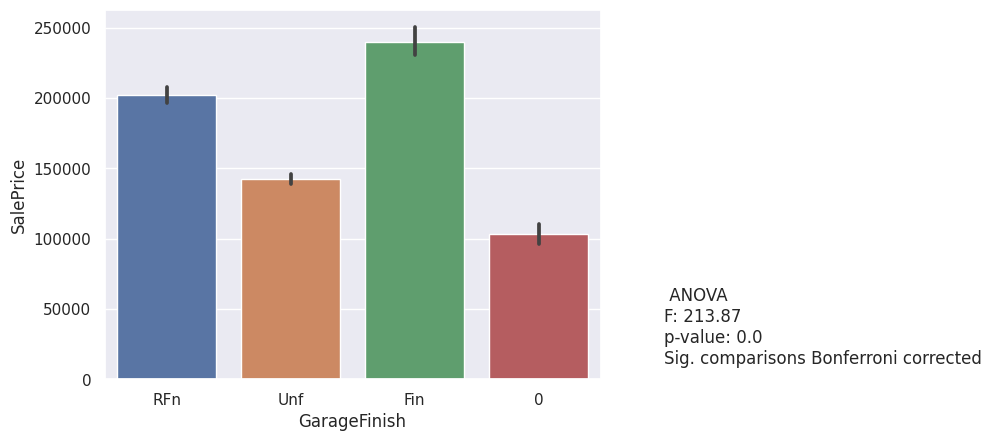

Unable to calculate white hetroscedasticity


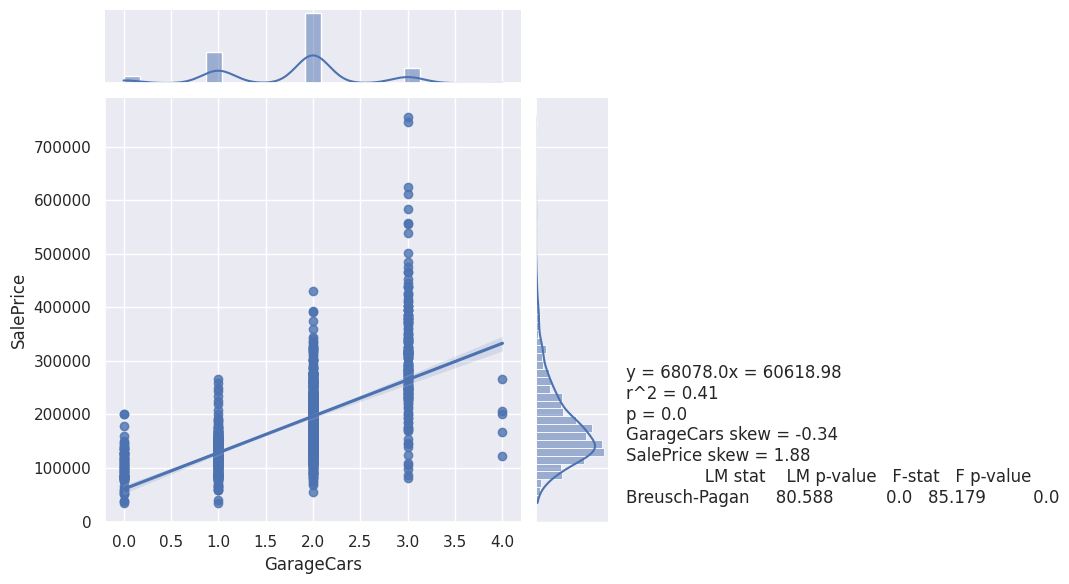

Unable to calculate white hetroscedasticity


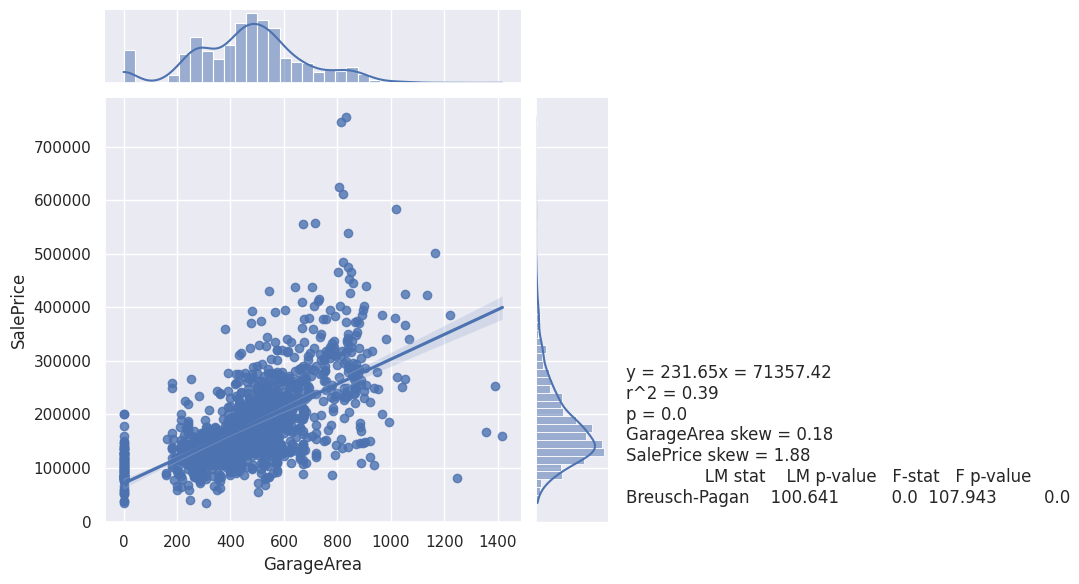

 TA n= 1311; and Fa n=48; No ttest performed
 TA n= 1311; and Gd n=14; No ttest performed
 TA n= 1311; and 0 n=81; No ttest performed
 TA n= 1311; and Ex n=3; No ttest performed
 TA n= 1311; and Po n=3; No ttest performed
 Fa n= 48; and Gd n=14; No ttest performed
 Fa n= 48; and 0 n=81; No ttest performed
 Fa n= 48; and Ex n=3; No ttest performed
 Fa n= 48; and Po n=3; No ttest performed
 Gd n= 14; and 0 n=81; No ttest performed
 Gd n= 14; and Ex n=3; No ttest performed
 Gd n= 14; and Po n=3; No ttest performed
 0 n= 81; and Ex n=3; No ttest performed
 0 n= 81; and Po n=3; No ttest performed
 Ex n= 3; and Po n=3; No ttest performed


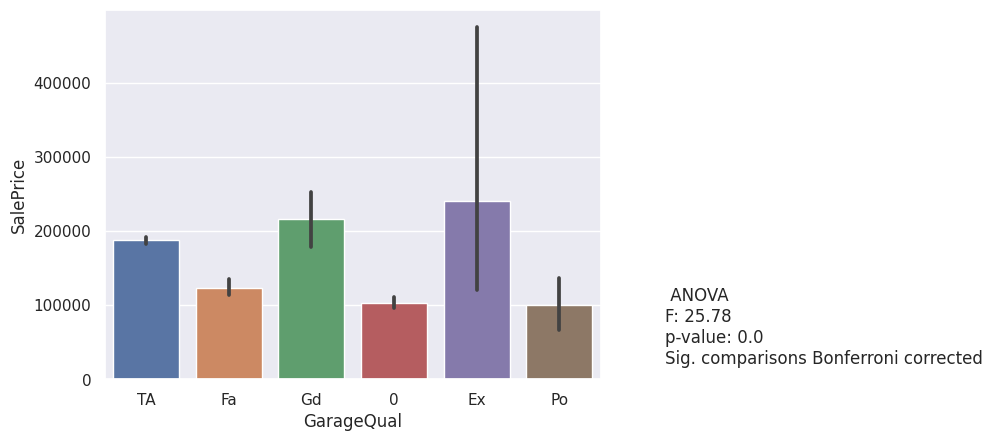

 TA n= 1326; and Fa n=35; No ttest performed
 TA n= 1326; and 0 n=81; No ttest performed
 TA n= 1326; and Gd n=9; No ttest performed
 TA n= 1326; and Po n=7; No ttest performed
 TA n= 1326; and Ex n=2; No ttest performed
 Fa n= 35; and 0 n=81; No ttest performed
 Fa n= 35; and Gd n=9; No ttest performed
 Fa n= 35; and Po n=7; No ttest performed
 Fa n= 35; and Ex n=2; No ttest performed
 0 n= 81; and Gd n=9; No ttest performed
 0 n= 81; and Po n=7; No ttest performed
 0 n= 81; and Ex n=2; No ttest performed
 Gd n= 9; and Po n=7; No ttest performed
 Gd n= 9; and Ex n=2; No ttest performed
 Po n= 7; and Ex n=2; No ttest performed


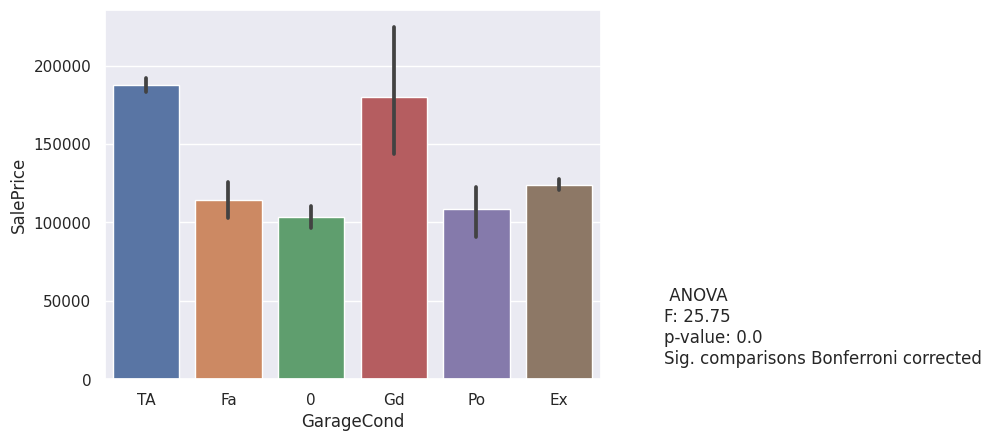

 Y n= 1340; and N n=90; No ttest performed
 Y n= 1340; and P n=30; No ttest performed
 N n= 90; and P n=30; No ttest performed


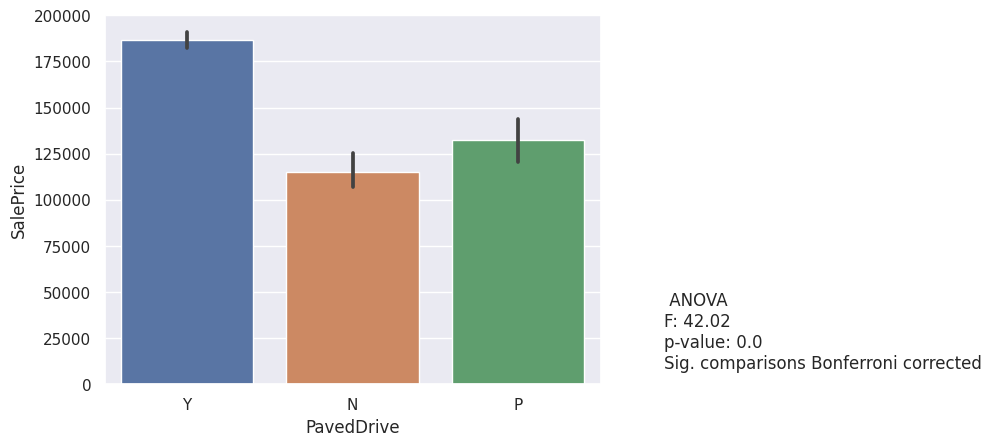

Unable to calculate white hetroscedasticity


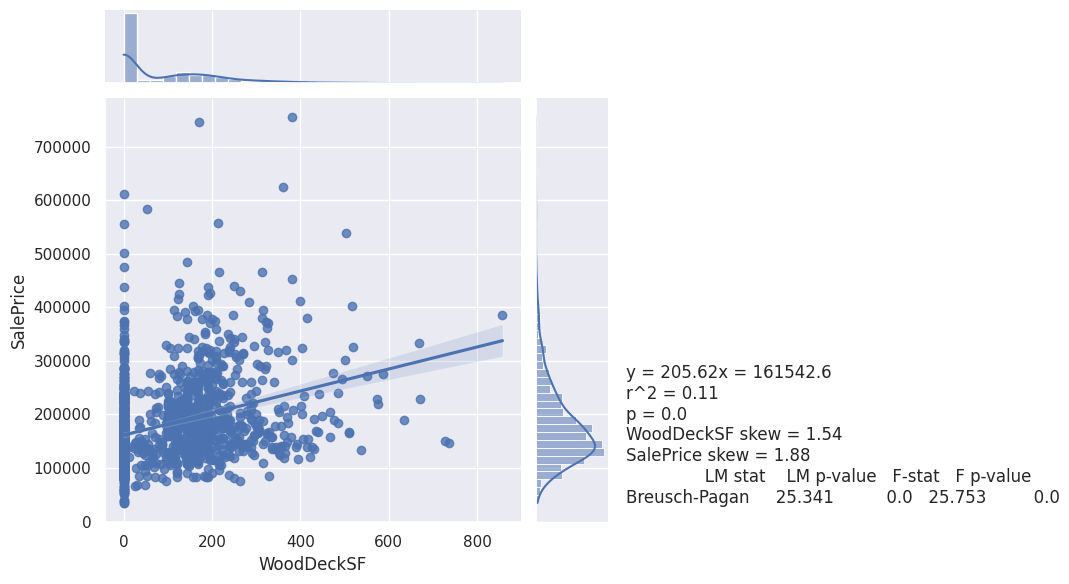

Unable to calculate white hetroscedasticity


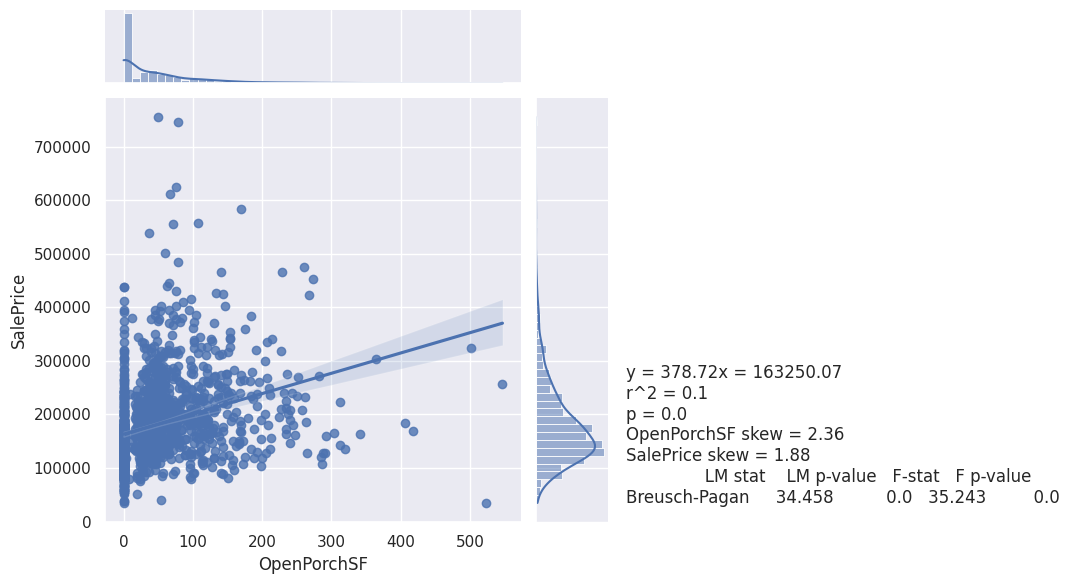

Unable to calculate white hetroscedasticity


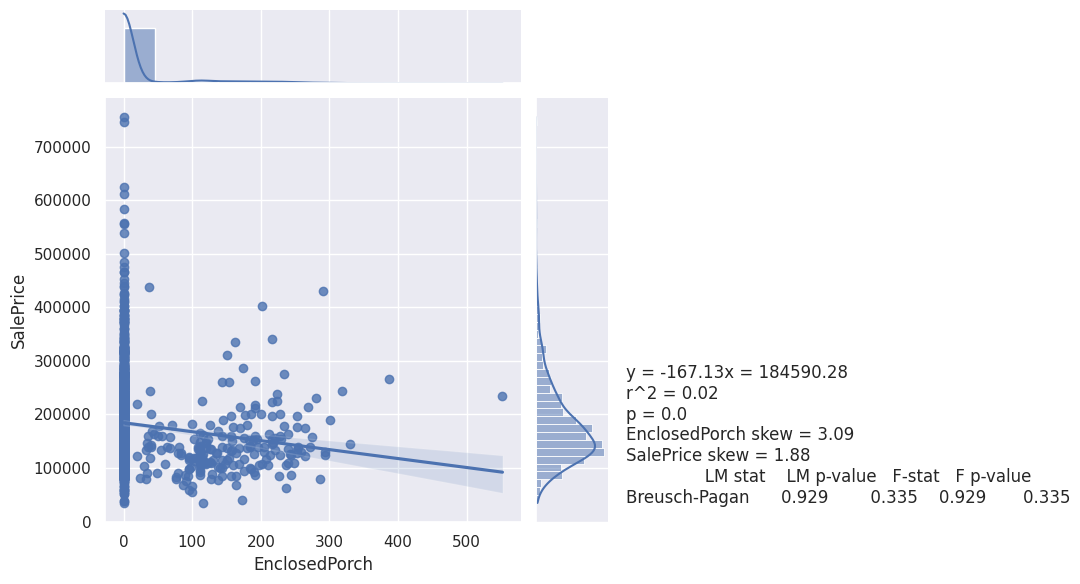

Unable to calculate white hetroscedasticity


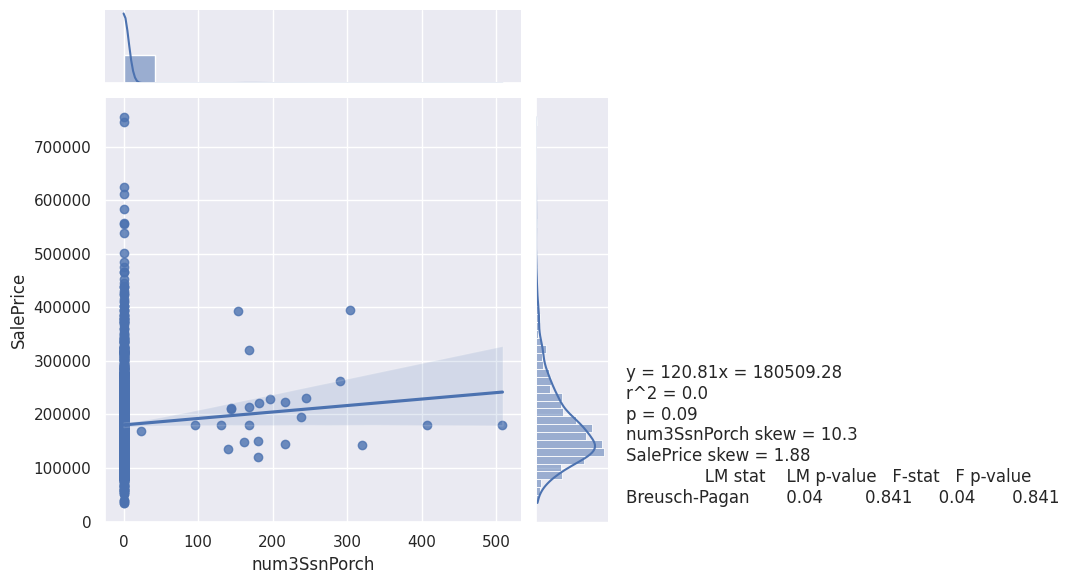

Unable to calculate white hetroscedasticity


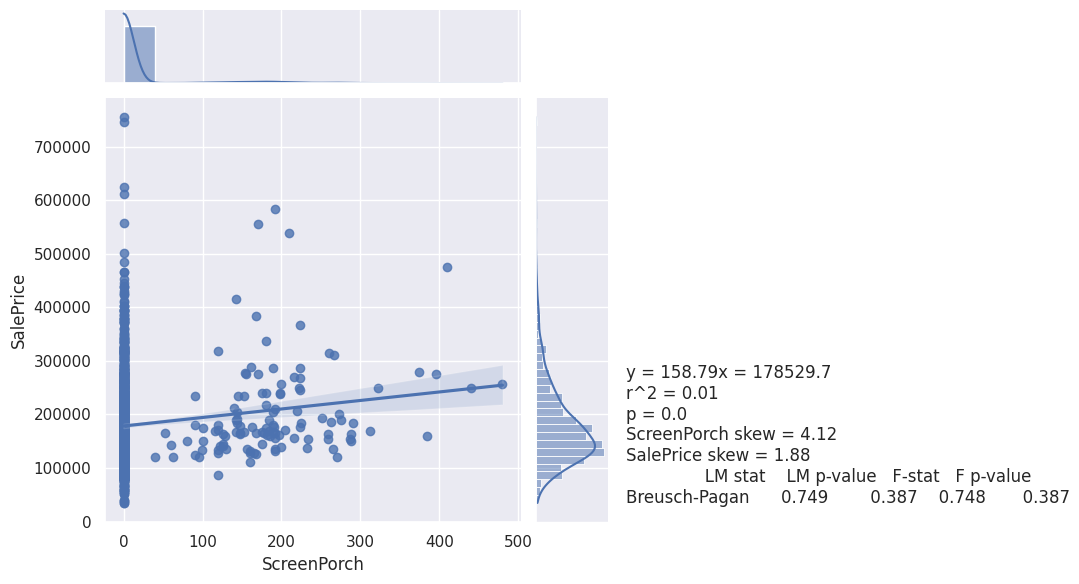

Unable to calculate white hetroscedasticity


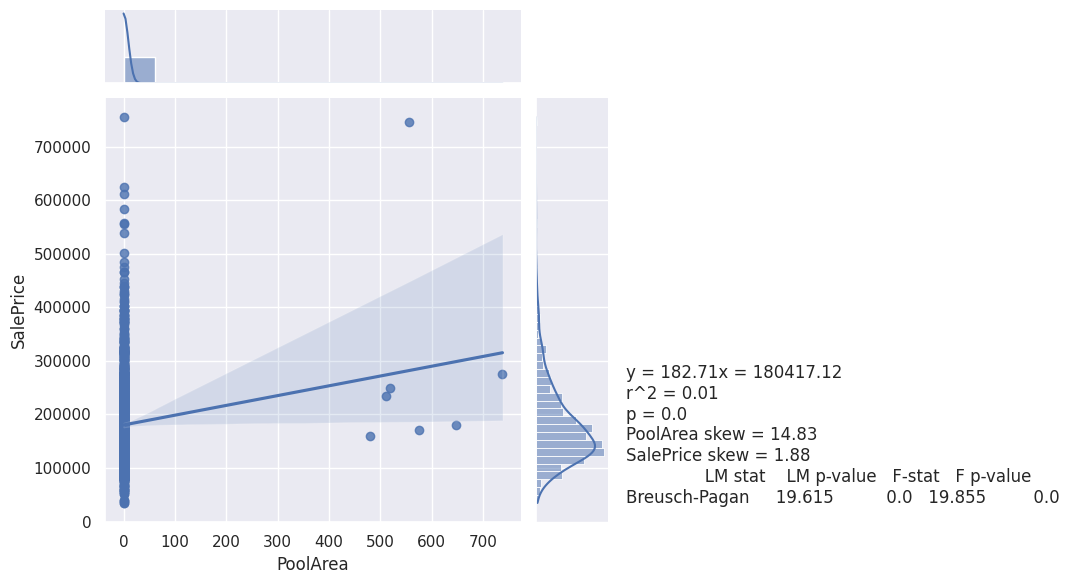

 0 n= 1453; and Ex n=2; No ttest performed
 0 n= 1453; and Fa n=2; No ttest performed
 0 n= 1453; and Gd n=3; No ttest performed
 Ex n= 2; and Fa n=2; No ttest performed
 Ex n= 2; and Gd n=3; No ttest performed
 Fa n= 2; and Gd n=3; No ttest performed


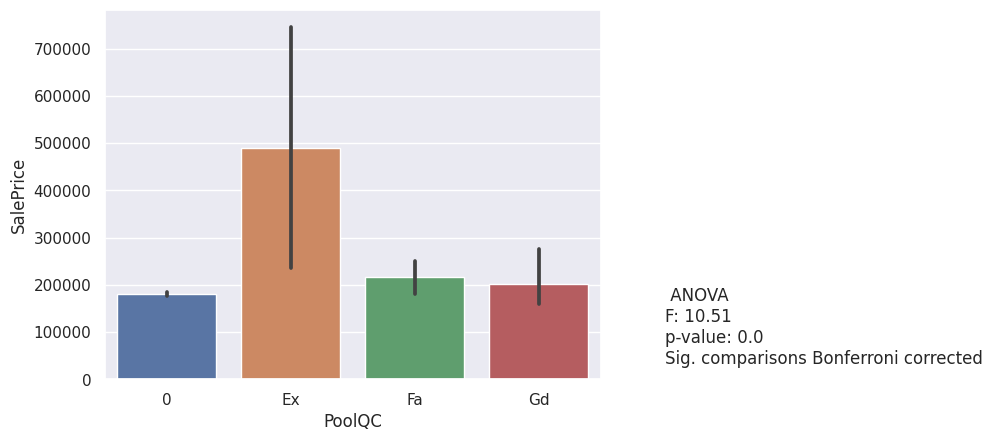

 0 n= 1179; and MnPrv n=157; No ttest performed
 0 n= 1179; and GdWo n=54; No ttest performed
 0 n= 1179; and GdPrv n=59; No ttest performed
 0 n= 1179; and MnWw n=11; No ttest performed
 MnPrv n= 157; and GdWo n=54; No ttest performed
 MnPrv n= 157; and GdPrv n=59; No ttest performed
 MnPrv n= 157; and MnWw n=11; No ttest performed
 GdWo n= 54; and GdPrv n=59; No ttest performed
 GdWo n= 54; and MnWw n=11; No ttest performed
 GdPrv n= 59; and MnWw n=11; No ttest performed


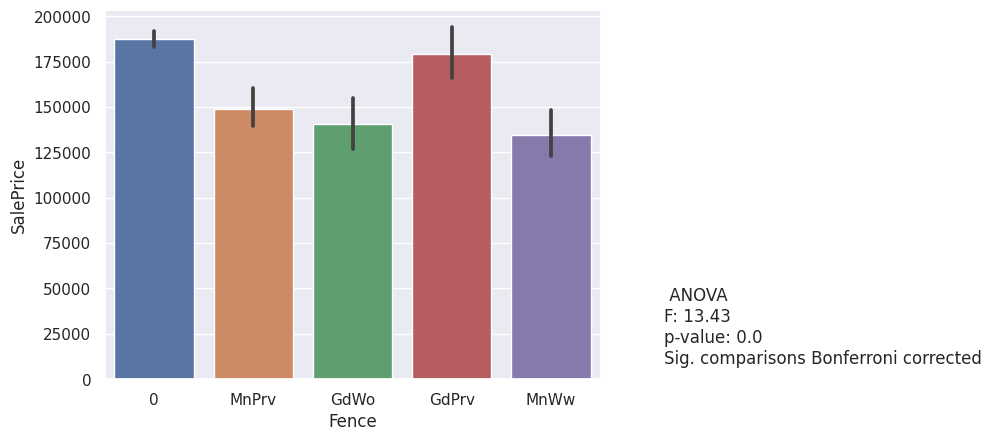

 0 n= 1406; and Shed n=49; No ttest performed
 0 n= 1406; and Gar2 n=2; No ttest performed
 0 n= 1406; and Othr n=2; No ttest performed
 0 n= 1406; and TenC n=1; No ttest performed
 Shed n= 49; and Gar2 n=2; No ttest performed
 Shed n= 49; and Othr n=2; No ttest performed
 Shed n= 49; and TenC n=1; No ttest performed
 Gar2 n= 2; and Othr n=2; No ttest performed
 Gar2 n= 2; and TenC n=1; No ttest performed
 Othr n= 2; and TenC n=1; No ttest performed


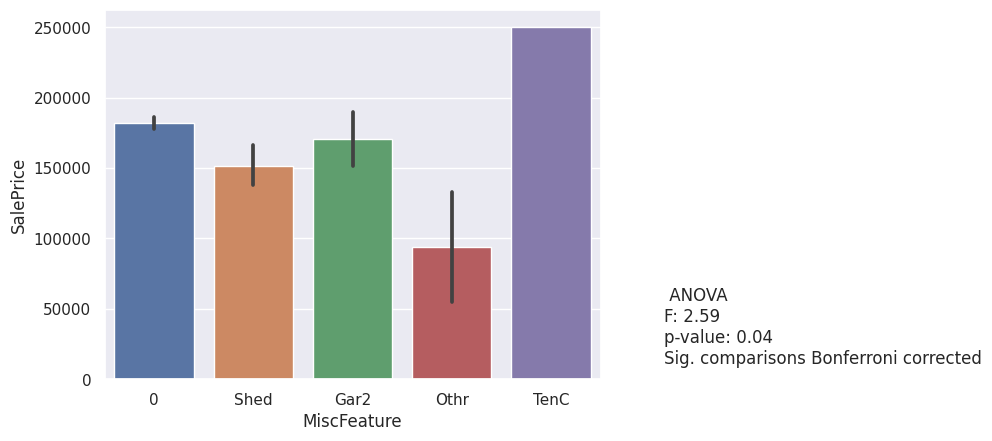

Unable to calculate white hetroscedasticity


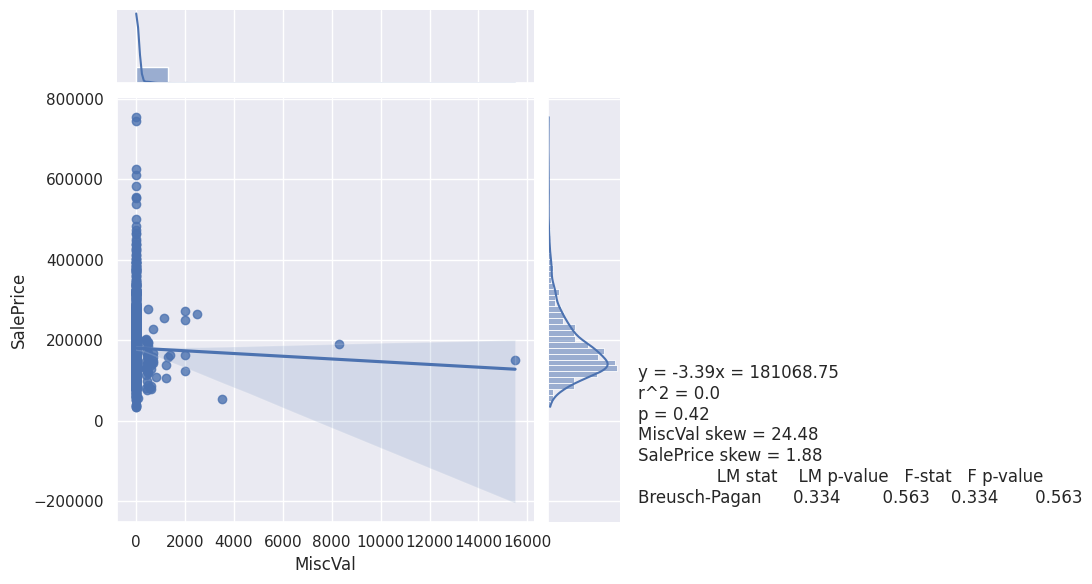

Unable to calculate white hetroscedasticity


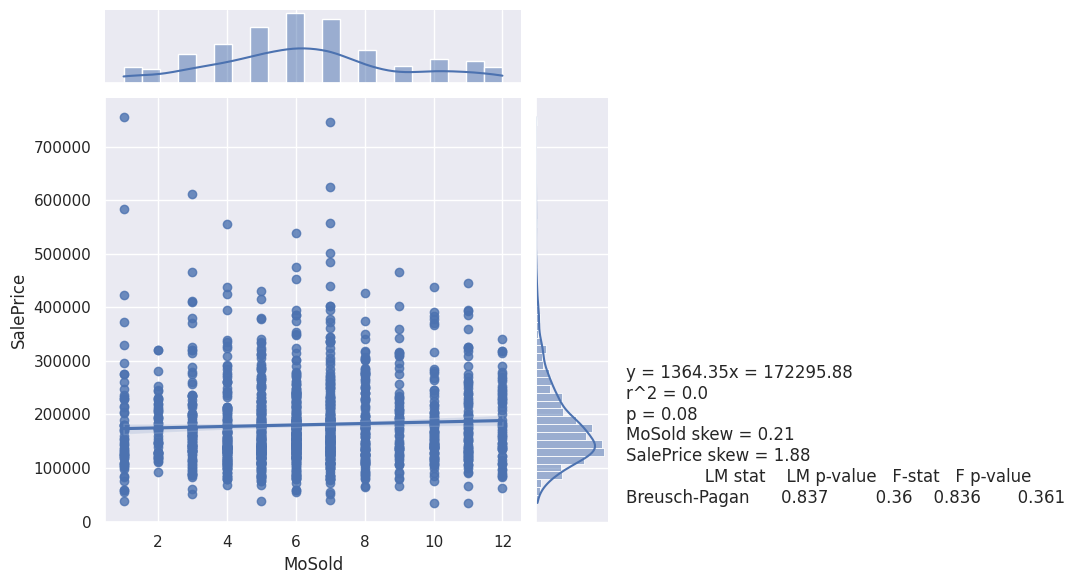

Unable to calculate white hetroscedasticity


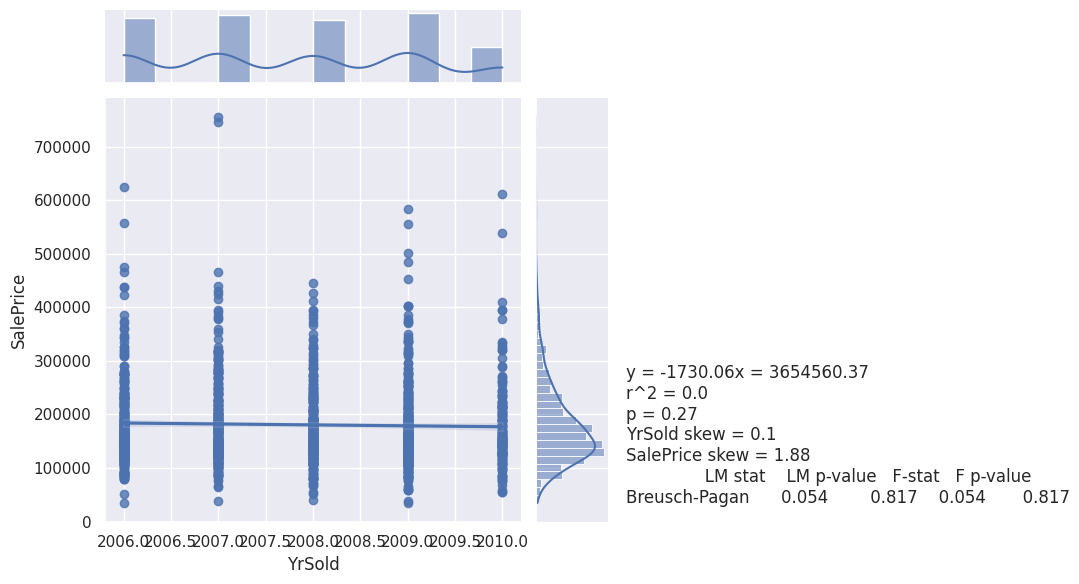

 WD n= 1267; and New n=122; No ttest performed
 WD n= 1267; and COD n=43; No ttest performed
 WD n= 1267; and ConLD n=9; No ttest performed
 WD n= 1267; and ConLI n=5; No ttest performed
 WD n= 1267; and CWD n=4; No ttest performed
 WD n= 1267; and ConLw n=5; No ttest performed
 WD n= 1267; and Con n=2; No ttest performed
 WD n= 1267; and Oth n=3; No ttest performed
 New n= 122; and COD n=43; No ttest performed
 New n= 122; and ConLD n=9; No ttest performed
 New n= 122; and ConLI n=5; No ttest performed
 New n= 122; and CWD n=4; No ttest performed
 New n= 122; and ConLw n=5; No ttest performed
 New n= 122; and Con n=2; No ttest performed
 New n= 122; and Oth n=3; No ttest performed
 COD n= 43; and ConLD n=9; No ttest performed
 COD n= 43; and ConLI n=5; No ttest performed
 COD n= 43; and CWD n=4; No ttest performed
 COD n= 43; and ConLw n=5; No ttest performed
 COD n= 43; and Con n=2; No ttest performed
 COD n= 43; and Oth n=3; No ttest performed
 ConLD n= 9; and ConLI n=5; No ttest pe

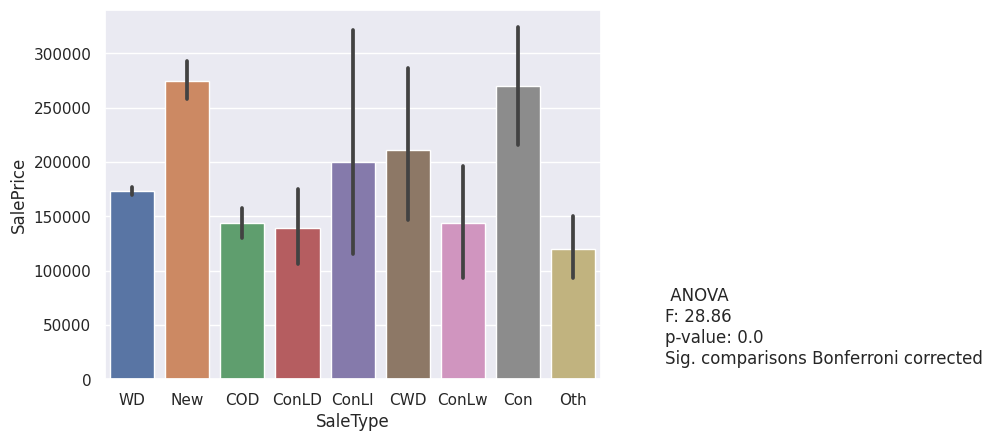

 Normal n= 1198; and Abnorml n=101; No ttest performed
 Normal n= 1198; and Partial n=125; No ttest performed
 Normal n= 1198; and AdjLand n=4; No ttest performed
 Normal n= 1198; and Alloca n=12; No ttest performed
 Normal n= 1198; and Family n=20; No ttest performed
 Abnorml n= 101; and Partial n=125; No ttest performed
 Abnorml n= 101; and AdjLand n=4; No ttest performed
 Abnorml n= 101; and Alloca n=12; No ttest performed
 Abnorml n= 101; and Family n=20; No ttest performed
 Partial n= 125; and AdjLand n=4; No ttest performed
 Partial n= 125; and Alloca n=12; No ttest performed
 Partial n= 125; and Family n=20; No ttest performed
 AdjLand n= 4; and Alloca n=12; No ttest performed
 AdjLand n= 4; and Family n=20; No ttest performed
 Alloca n= 12; and Family n=20; No ttest performed


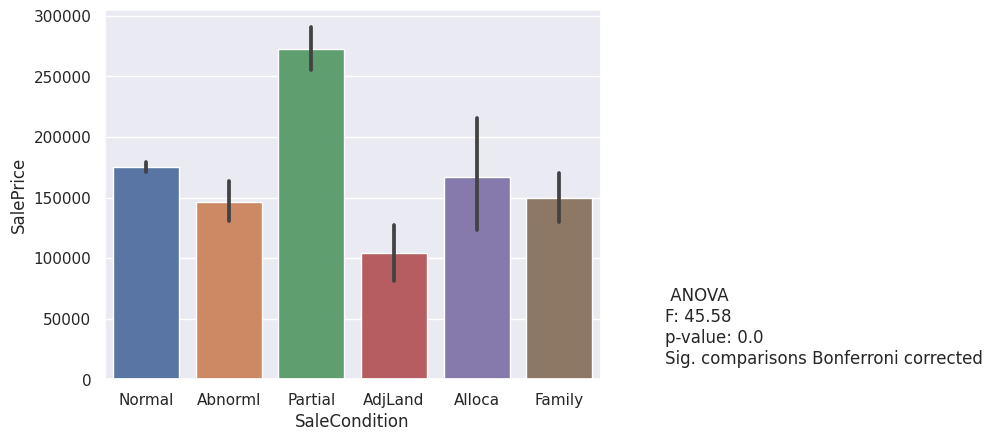

r        F  X2  p-value
OverallQual    0.791      NaN NaN    0.000
GrLivArea      0.709      NaN NaN    0.000
GarageCars     0.640      NaN NaN    0.000
GarageArea     0.623      NaN NaN    0.000
TotalBsmtSF    0.614      NaN NaN    0.000
num1stFlrSF    0.606      NaN NaN    0.000
FullBath       0.561      NaN NaN    0.000
TotRmsAbvGrd   0.534      NaN NaN    0.000
YearBuilt      0.523      NaN NaN    0.000
YearRemodAdd   0.507      NaN NaN    0.000
MasVnrArea     0.473      NaN NaN    0.000
Fireplaces     0.467      NaN NaN    0.000
BsmtFinSF1     0.386      NaN NaN    0.000
WoodDeckSF     0.324      NaN NaN    0.000
num2ndFlrSF    0.319      NaN NaN    0.000
OpenPorchSF    0.316      NaN NaN    0.000
HalfBath       0.284      NaN NaN    0.000
LotArea        0.264      NaN NaN    0.000
GarageYrBlt    0.261      NaN NaN    0.000
BsmtFullBath   0.227      NaN NaN    0.000
BsmtUnfSF      0.214      NaN NaN    0.000
LotFrontage    0.210      NaN NaN    0.000
BedroomAbvGr   0.168      NaN NaN    0.000
KitchenAbvGr  -0.136      NaN NaN    0.000
EnclosedPorch -0.129      NaN NaN    0.000
ScreenPorch    0.111      NaN NaN    0.000
PoolArea       0.092      NaN NaN    0.000
MSSubClass    -0.084      NaN NaN    0.001
OverallCond   -0.078      NaN NaN    0.003
MoSold         0.046      NaN NaN    0.076
num3SsnPorch   0.045      NaN NaN    0.089
YrSold        -0.029      NaN NaN    0.269
LowQualFinSF  -0.026      NaN NaN    0.328
Id            -0.022      NaN NaN    0.403
MiscVal       -0.021      NaN NaN    0.418
BsmtHalfBath  -0.017      NaN NaN    0.520
BsmtFinSF2    -0.011      NaN NaN    0.664
ExterQual        NaN  443.335 NaN    0.000
KitchenQual      NaN  407.806 NaN    0.000
BsmtQual         NaN  316.149 NaN    0.000
GarageFinish     NaN  213.867 NaN    0.000
FireplaceQu      NaN  121.075 NaN    0.000
MasVnrType       NaN  108.911 NaN    0.000
Foundation       NaN  100.254 NaN    0.000
CentralAir       NaN   98.305 NaN    0.000
HeatingQC        NaN   88.394 NaN    0.000
GarageType       NaN   80.380 NaN    0.000
Neighborhood     NaN   71.785 NaN    0.000
BsmtFinType1     NaN   64.688 NaN    0.000
BsmtExposure     NaN   63.940 NaN    0.000
SaleCondition    NaN   45.578 NaN    0.000
MSZoning         NaN   43.840 NaN    0.000
PavedDrive       NaN   42.024 NaN    0.000
LotShape         NaN   40.133 NaN    0.000
SaleType         NaN   28.863 NaN    0.000
GarageQual       NaN   25.776 NaN    0.000
GarageCond       NaN   25.750 NaN    0.000
BsmtCond         NaN   19.708 NaN    0.000
HouseStyle       NaN   19.595 NaN    0.000
Exterior1st      NaN   18.612 NaN    0.000
Electrical       NaN   18.460 NaN    0.000
RoofStyle        NaN   17.805 NaN    0.000
Exterior2nd      NaN   17.501 NaN    0.000
Alley            NaN   15.177 NaN    0.000
Fence            NaN   13.433 NaN    0.000
BldgType         NaN   13.011 NaN    0.000
LandContour      NaN   12.850 NaN    0.000
PoolQC           NaN   10.510 NaN    0.000
ExterCond        NaN    8.799 NaN    0.000
LotConfig        NaN    7.810 NaN    0.000
BsmtFinType2     NaN    7.565 NaN    0.000
RoofMatl         NaN    6.727 NaN    0.000
Condition1       NaN    6.118 NaN    0.000
Heating          NaN    4.260 NaN    0.001
Functional       NaN    4.058 NaN    0.000
MiscFeature      NaN    2.594 NaN    0.035
Street           NaN    2.459 NaN    0.117
Condition2       NaN    2.074 NaN    0.043
LandSlope        NaN    1.959 NaN    0.141
Utilities        NaN    0.299 NaN    0.585

In [217]:
bivstats(df, 'SalePrice')

# Multivariate analysis and Encoding

# OneHot Encoding

### VIF 

In [271]:
def vif(df):
    import pandas as pd
    from sklearn.linear_model import LinearRegression
    
    vif_dict, tolerance_dict = {}, {}
    
    for col in df.drop(columns=['SalePrice']):
        y = df[col]
        X = df.drop(columns=[col])
        
        r_squared = LinearRegression().fit(X=X, y=y).score(X,y)
    
        if r_squared  < 1:
            vif = 1 / (1 - r_squared)
        else:
            vif = 100
    
        vif_dict[col] = vif
        
        tolerance = 1 - r_squared
        tolerance_dict[col] = tolerance
        
        df_output = pd.DataFrame({"VIF": vif_dict, "tolerance": tolerance_dict})
        
    return df_output.sort_values(by=["VIF"], ascending=True)
    
    

In [272]:
pd.set_option('display.max_rows', 100)
vif(df)

VIF  tolerance
Fence_MnWw           1.193598   0.837803
Condition1_RRNe      1.193744   0.837701
SaleType_Con         1.207512   0.828149
SaleType_Oth         1.228908   0.813731
num3SsnPorch         1.230347   0.812779
...                       ...        ...
BsmtExposure_Av    194.111534   0.005152
BsmtFinType2_Unf   208.489557   0.004796
PoolArea           238.990076   0.004184
BsmtExposure_No    341.162262   0.002931
GarageYrBlt       2179.556022   0.000459

[260 rows x 2 columns]

### Encoding (OneHot) and Standardization (MinMax scaling)

In [18]:
def mlr_prepare(df):
    import numpy as np
    import pandas as pd
    from sklearn import preprocessing
    
    for col in df:
        if not pd.api.types.is_numeric_dtype(df[col]):
            df = df.join(pd.get_dummies(df[col], prefix=col, drop_first=False))
    
    df = df.select_dtypes(np.number)
    df_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df), columns=df.columns)
    
    return df_minmax

### OLS

In [26]:
def mlr(df, label):
    import numpy as np
    import pandas as pd
    import statsmodels.api as sm
    
    y = df[label]
    X = df.drop(columns=[label]).assign(const=1)
    
    results = sm.OLS(y, X).fit()
    return results

In [31]:
def mlr_feature_df(results):
    df_features = pd.DataFrame({'coef':results.params, 't':abs(results.tvalues), 'p':results.pvalues})
    df_features.drop(labels=['const'], inplace=True)
    df_features = df_features.sort_values(by=['t', 'p'])
    return df_features

In [38]:
def mlr_fit(results, actual, roundto=10):
    import numpy as np
    
    df_features = mlr_feature_df(results)
    residuals = np.array(actual) - np.array(results.fittedvalues)
    rmse = np.sqrt(sum((residuals**2))/len(actual))
    mae = np.mean(abs(np.array(actual) - np.array(results.fittedvalues)))
    
    fit_stats = [round(results.rsquared, roundto), round(results.rsquared_adj, roundto),
                round(results.rsquared - results.rsquared_adj, roundto), round(rmse, roundto),
                round(mae, roundto), [df_features.index.values]]
    return fit_stats
    

## Encoding, Scaling and OLS in a loop for every colum

In [41]:
def mlr_step(df, label, min=2):
    df_models = pd.DataFrame(columns=['R2', 'R2a', 'diff', 'RMSE', 'MAE', 'features'])
    
    df = mlr_prepare(df)
    results = mlr(df, label)
    
    df_models.loc[str(len(results.params))] = mlr_fit(results, df[label], 10)
    
    df_features = mlr_feature_df(results)
    
    while len(results.params) >= min:
        df = df.drop(columns=[df_features.index[0]])
        results = mlr(df, label)
        df_features = mlr_feature_df(results)
        df_models.loc[len(results.params)] = mlr_fit(results, df[label], 10)
        
    df_models.to_csv(label + ".csv")
    df_models.drop(columns=['features'], inplace=True)
    
    return df_models

In [42]:
df_models = mlr_step(df, 'SalePrice')
df_models

R2       R2a      diff      RMSE       MAE
37  0.816397  0.812017  0.004381  0.047255  0.029072
36  0.816397  0.812017  0.004381  0.047255  0.029072
35  0.816396  0.812147  0.004249  0.047256  0.029073
34  0.816393  0.812276  0.004117  0.047256  0.029071
33  0.816393  0.812276  0.004117  0.047256  0.029071
32  0.816385  0.812399  0.003986  0.047257  0.029068
31  0.816370  0.812515  0.003855  0.047259  0.029085
30  0.816346  0.812622  0.003724  0.047262  0.029073
29  0.816321  0.812727  0.003594  0.047265  0.029064
28  0.816291  0.812828  0.003464  0.047269  0.029130
27  0.816229  0.812895  0.003334  0.047277  0.029117
26  0.816161  0.812956  0.003205  0.047286  0.029138
25  0.816074  0.812998  0.003076  0.047297  0.029182
24  0.815955  0.813007  0.002948  0.047312  0.029214
23  0.815819  0.812999  0.002820  0.047330  0.029222
22  0.815640  0.812948  0.002692  0.047353  0.029233
21  0.815330  0.812763  0.002567  0.047392  0.029146
20  0.814806  0.812362  0.002444  0.047460  0.029300
19  0.814290  0.811970  0.002320  0.047526  0.029243
18  0.813831  0.811636  0.002195  0.047585  0.029333
17  0.812406  0.810326  0.002080  0.047766  0.029464
16  0.811165  0.809203  0.001962  0.047924  0.029443
15  0.809308  0.807460  0.001848  0.048159  0.029535
14  0.807230  0.805497  0.001733  0.048421  0.029717
13  0.805605  0.803993  0.001612  0.048624  0.029705
12  0.802923  0.801426  0.001497  0.048959  0.029909
11  0.799775  0.798393  0.001382  0.049348  0.030436
10  0.795605  0.794337  0.001269  0.049859  0.030995
9   0.790774  0.789621  0.001154  0.050445  0.031278
8   0.786352  0.785322  0.001030  0.050975  0.031953
7   0.779243  0.778331  0.000912  0.051817  0.032650
6   0.772122  0.771339  0.000784  0.052646  0.033500
5   0.756886  0.756217  0.000668  0.054377  0.035869
4   0.739757  0.739221  0.000536  0.056260  0.037151
3   0.693574  0.693153  0.000421  0.061048  0.042177
2   0.625652  0.625395  0.000257  0.067476  0.046830
1   0.000000  0.000000  0.000000  0.110284  0.079759

# Using automatic libraries for EDA

- Lastly some libraries like dtale, ydata-profiling and lux can be used for EDA. I am not a big fan of them. but feel free to check them out. They are most useful for analytics and report generation in my opinion.